# Macroeconomic analysis - figures and vizualization
* Responsible: Joakim Blix Prestmo
* Contributor: Haakon Trønnes
* Data sources: Statistics Norway, ECB, NAV, FED, Norges Bank mv. 
* Last update: 28th april 2021



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
# import pandas_datareader.data as web

pd.options.display.max_columns=250
pd.options.display.max_rows=250

## Changes
* No recent changes

In [2]:
sns.__version__, pd.__version__

('0.11.2', '1.3.4')

In [33]:
fixedprices = "2019-priser"
lastquarter = "2021Q4"

<h2>National accounts</h2>
Source: Statitics Norway

In [40]:
# Nasjonalregnskapet, faste priser, ses just og ujustert
dfses = pd.read_csv('http://data.ssb.no/api/v0/dataset/59022.csv?lang=no', encoding = 'latin1', na_values = '..', sep=";")
dfses  = dfses[dfses["statistikkvariabel"]=="Faste "+fixedprices+", sesongjustert (mill. kr)"]
dfses.drop('statistikkvariabel',1, inplace=True)
dfses['kvartal'] =pd.Series(dfses['kvartal']).str.replace('K', 'Q')
pd.to_datetime(dfses['kvartal'])
# # 
dfses = dfses.pivot(index = 'kvartal', columns = 'makrostørrelse', values = '09190: Makroøkonomiske hovedstørrelser, etter makrostørrelse, kvartal og statistikkvariabel')

dfses.columns = [dfses.columns.str.split(' ')[i][0] for i in range(len(dfses.columns))]
kolonnenavn = list(dfses.columns.values)

dfses.tail()

C:\Users\JPREST~1\AppData\Local\Temp/ipykernel_10204/3879490215.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfses.drop('statistikkvariabel',1, inplace=True)


,bif.nr8307,bif.nr8368,bif.nr83_6,bif.nr83_6fn,bif.nr83_6fnxof,bif.nr83indberg,bif.nr83naer,bif.nr83oljroer,bif.nr83rest,bif.nr83vare,bif.nr84_5,bif.nr8_,bif.pub8X50A,bil.nr8lu_,biv.nr0890,bnpb.nr23_6fn,bnpb.nr23_6fnxof,bnpb.nr23_9,bnpb.nr23_9fn,bnpb.nr23indberg,bnpb.nr23oljsj,bnpb.nr23ptjfn,bnpb.nr23vare,bnpb.nr24_5,bnpb.nr29korr,eks.nrskiplfly,eks.nrtjen,eks.nrtot,eks.nrtradvare,eks.puboljegs,imp.nrskiplfly,imp.nrtjen,imp.nrtot,imp.nrtradvare,imp.puboljegs,koh.nr61L8,koh.nr61L9,koh.nr61_,koh.nr61tjen,koh.nr61vare,koh.nrpriv,koi.nr66_,koo.nr6401,koo.nr64_,koo.nr64sivil,koo.nr65_,koo.nroff,makrok.nrefn,makrok.nreoff,makrok.nrianv,makrok.nrsanv
kvartal,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020Q4,463,48400,225615,182010,129330,11272,80931,42080,50810,18385,52680,239133,1524,13495,23,662404,489853,894991,763057,56755,131934,341549,91549,172550,100654,1126,81278,323284,109146,131734,5335,73809,272536,187886,5506,2115,-4300,358472,168386,192272,377066,18594,13469,112996,99527,115048,228045,787121,280724,844244,1167527
2021Q1,580,48419,224152,181739,131367,11793,82948,40738,50330,20244,50371,242016,1675,17864,0,659446,488793,894661,758417,57608,136244,338582,92603,170653,98971,1573,81393,322534,113283,126284,6100,69748,259818,179518,4452,1476,-3029,347174,160250,188477,364679,17504,13394,110237,96843,115014,225250,771668,275622,831945,1154479
2021Q2,614,49838,223816,180256,133266,12164,83428,43424,50754,19897,46989,243499,137,19642,41,664825,492251,901891,765725,57530,136166,342701,92019,172574,100900,3082,80454,328074,112156,132381,5616,68138,272492,190590,8147,1426,-2403,356530,163815,193692,375093,18563,13474,111549,98075,116169,227718,783066,274707,846310,1174383
2021Q3,675,46782,221832,180312,127871,11195,81089,41372,53057,16162,52441,245421,148,23484,105,683078,506273,937331,787063,57509,150268,355335,93429,176805,103985,7704,87677,349284,113244,140660,10088,79808,287296,194533,2867,7781,-4579,375850,177902,194746,397715,21865,13454,114180,100726,118027,232207,810234,284648,875344,1224627
2021Q4,654,48776,231061,189716,134229,13215,85453,41072,54920,16663,55486,245365,273,14181,124,692739,514717,937983,798412,57002,139571,365228,92488,178022,105673,975,92503,340054,110633,135942,7931,90321,290332,188499,3581,14751,-8322,387426,187211,193786,410352,22926,13550,114796,101246,117748,232545,832612,288031,888261,1228315


In [22]:
url = 'https://www.ssb.no/statbank/sq/10035447'
dfmnd = pd.read_excel(url, skiprows=3, skipfooter=50)

In [6]:
dfmnd.tail()

,Unnamed: 0,Konsum i husholdninger og ideelle organisasjoner,¬ Konsum i husholdninger,¬¬ Varekonsum,¬¬ Tjenestekonsum,¬¬ Husholdningenes kjøp i utlandet,¬¬ Utlendingers kjøp i Norge,¬ Konsum i ideelle organisasjoner,Konsum i offentlig forvaltning,¬ Konsum i statsforvaltningen,"¬¬¬ Konsum i statsforvaltningen, sivilt","¬¬¬ Konsum i statsforvaltningen, forsvar",¬ Konsum i kommuneforvaltningen,Bruttoinvestering i fast realkapital,¬ Utvinning og rørtransport (bruttoinvestering),¬ Utenriks sjøfart (bruttoinvestering),¬ Fastlands-Norge (bruttoinvestering),¬¬ Fastlands-Norge utenom offentlig forvaltning (bruttoinvestering),¬¬¬ Næringer (bruttoinvestering),¬¬¬¬ Tjenester tilknyttet utvinning (bruttoinvestering),¬¬¬¬ Andre tjenester (bruttoinvestering),¬¬¬¬ Industri og bergverk (bruttoinvestering),¬¬¬¬ Annen vareproduksjon (bruttoinvestering),¬¬¬ Boliger (husholdninger) (bruttoinvestering),¬¬¬ Offentlig forvaltning (bruttoinvestering),Anskaffelser minus avhendelse av verdigjenstander,Lagerendring og statistiske avvik,Bruttoinvestering i alt,Innenlandsk sluttanvendelse,Etterspørsel fra Fastlands-Norge (ekskl. lagerendring),Etterspørsel fra offentlig forvaltning,Eksport i alt,¬ Tradisjonelle varer (eksport),¬ Råolje og naturgass (eksport),"¬ Skip, plattformer og fly (eksport)",¬ Tjenester (eksport),Samlet sluttanvendelse,Import i alt,¬ Tradisjonelle varer (import),¬ Råolje og naturgass (import),"¬ Skip, plattformer og fly (import)",¬ Tjenester (import),"Bruttonasjonalprodukt, markedsverdi","Bruttonasjonalprodukt Fastlands-Norge, markedsverdi",Oljevirksomhet og utenriks sjøfart,"Bruttoprodukt Fastlands-Norge, basisverdi",¬ Fastlands-Norge utenom offentlig forvaltning (bruttoprodukt),¬¬ Industri og bergverk (bruttoprodukt),¬¬ Annen vareproduksjon (bruttoprodukt),¬¬ Tjenester inkl. boligtjenester (bruttoprodukt),¬ Offentlig forvaltning (bruttoprodukt),Produktavgifter og -subsidier
67,2021M08,132606,125323,64433,59793,2625,-1528,7283,77272,37872,33401,4471,39400,75438,13830,14,61595,42461,27425,225,18206,3681,5313,15036,19133,33,9000,84472,294349,271472,96405,114326,37209,47393,824,28900,408675,96955,64795,566,5192,26401,311720,262256,49464,227912,169015,19095,31620,118300,58897,34344
68,2021M09,134153,126794,64834,60895,3197,-2132,7359,77948,38419,33904,4515,39529,74229,13698,58,60473,43906,27771,227,18254,3782,5508,16135,16567,38,10136,84403,296504,272574,94515,119897,39407,48312,2067,30111,416401,97074,65202,1652,2757,27463,319327,264856,54471,229696,170189,19089,30930,120170,59507,35160
69,2021M10,136782,129157,63771,63363,4968,-2945,7625,77747,38318,33787,4532,39429,75358,13652,121,61585,43898,27536,218,17163,4351,5804,16361,17687,38,4828,80224,294753,276113,95434,114914,38942,44419,573,30979,409666,96588,63090,1191,1999,30309,313078,265915,47163,230880,171302,19095,29985,122222,59578,35035
70,2021M11,138680,131050,65226,63703,5124,-3003,7630,77677,38310,33783,4527,39367,74942,13516,124,61302,43654,27916,217,17968,4407,5324,15737,17649,43,8602,83587,299945,277660,95326,112026,36503,44337,224,30962,411970,99863,65522,1625,2200,30516,312107,266810,45297,231579,172205,18959,30653,122593,59375,35230
71,2021M12,134890,127218,64789,60144,4659,-2374,7672,77121,38168,33677,4491,38952,80760,13903,28,66829,46678,30001,219,19789,4457,5536,16677,20151,42,751,81554,293564,278839,97271,113115,35187,47186,179,30563,406679,93880,59887,765,3732,29496,312799,265687,47111,230279,171210,18948,31850,120412,59069,35408


In [23]:
dfmnd.rename(columns={'Unnamed: 0':'Date', 'Konsum i husholdninger og ideelle organisasjoner': 'HouseholdConsumption', 'Konsum i offentlig forvaltning': 'PublicConsumption',
                     '¬¬¬ Næringer (bruttoinvestering)':'IndustryInvest', '¬ Utvinning og rørtransport (bruttoinvestering)': 'OilInvest', 
                     'Bruttonasjonalprodukt Fastlands-Norge, markedsverdi': 'GDPMainland'}, inplace=True)

# dfmnd.drop(['Dato'], axis=1, inplace=True)
dfmnd.index=dfmnd['Date']
dfmnd.drop(['Date'], axis=1, inplace=True)



In [8]:
# dfmnd.rename(columns={'Unnamed: 0':'Dato', 'Konsum i husholdninger og ideelle organisasjoner': 'HushKonsum', 'Konsum i offentlig forvaltning': 'OffKonsum',
#                      '¬¬¬ Næringer (bruttoinvestering)':'NaearingsInvest', '¬ Utvinning og rørtransport (bruttoinvestering)': 'OljeInvest', 
#                      'Bruttonasjonalprodukt Fastlands-Norge, markedsverdi': 'BNPFN'}, inplace=True)
# dfmnd.drop(['Dato'], axis=1, inplace=True)

In [9]:
# dfses.tail()
dfmnd.tail()

,HouseholdConsumption,¬ Konsum i husholdninger,¬¬ Varekonsum,¬¬ Tjenestekonsum,¬¬ Husholdningenes kjøp i utlandet,¬¬ Utlendingers kjøp i Norge,¬ Konsum i ideelle organisasjoner,PublicConsumption,¬ Konsum i statsforvaltningen,"¬¬¬ Konsum i statsforvaltningen, sivilt","¬¬¬ Konsum i statsforvaltningen, forsvar",¬ Konsum i kommuneforvaltningen,Bruttoinvestering i fast realkapital,OilInvest,¬ Utenriks sjøfart (bruttoinvestering),¬ Fastlands-Norge (bruttoinvestering),¬¬ Fastlands-Norge utenom offentlig forvaltning (bruttoinvestering),IndustryInvest,¬¬¬¬ Tjenester tilknyttet utvinning (bruttoinvestering),¬¬¬¬ Andre tjenester (bruttoinvestering),¬¬¬¬ Industri og bergverk (bruttoinvestering),¬¬¬¬ Annen vareproduksjon (bruttoinvestering),¬¬¬ Boliger (husholdninger) (bruttoinvestering),¬¬¬ Offentlig forvaltning (bruttoinvestering),Anskaffelser minus avhendelse av verdigjenstander,Lagerendring og statistiske avvik,Bruttoinvestering i alt,Innenlandsk sluttanvendelse,Etterspørsel fra Fastlands-Norge (ekskl. lagerendring),Etterspørsel fra offentlig forvaltning,Eksport i alt,¬ Tradisjonelle varer (eksport),¬ Råolje og naturgass (eksport),"¬ Skip, plattformer og fly (eksport)",¬ Tjenester (eksport),Samlet sluttanvendelse,Import i alt,¬ Tradisjonelle varer (import),¬ Råolje og naturgass (import),"¬ Skip, plattformer og fly (import)",¬ Tjenester (import),"Bruttonasjonalprodukt, markedsverdi",GDPMainland,Oljevirksomhet og utenriks sjøfart,"Bruttoprodukt Fastlands-Norge, basisverdi",¬ Fastlands-Norge utenom offentlig forvaltning (bruttoprodukt),¬¬ Industri og bergverk (bruttoprodukt),¬¬ Annen vareproduksjon (bruttoprodukt),¬¬ Tjenester inkl. boligtjenester (bruttoprodukt),¬ Offentlig forvaltning (bruttoprodukt),Produktavgifter og -subsidier
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021M08,132606,125323,64433,59793,2625,-1528,7283,77272,37872,33401,4471,39400,75438,13830,14,61595,42461,27425,225,18206,3681,5313,15036,19133,33,9000,84472,294349,271472,96405,114326,37209,47393,824,28900,408675,96955,64795,566,5192,26401,311720,262256,49464,227912,169015,19095,31620,118300,58897,34344
2021M09,134153,126794,64834,60895,3197,-2132,7359,77948,38419,33904,4515,39529,74229,13698,58,60473,43906,27771,227,18254,3782,5508,16135,16567,38,10136,84403,296504,272574,94515,119897,39407,48312,2067,30111,416401,97074,65202,1652,2757,27463,319327,264856,54471,229696,170189,19089,30930,120170,59507,35160
2021M10,136782,129157,63771,63363,4968,-2945,7625,77747,38318,33787,4532,39429,75358,13652,121,61585,43898,27536,218,17163,4351,5804,16361,17687,38,4828,80224,294753,276113,95434,114914,38942,44419,573,30979,409666,96588,63090,1191,1999,30309,313078,265915,47163,230880,171302,19095,29985,122222,59578,35035
2021M11,138680,131050,65226,63703,5124,-3003,7630,77677,38310,33783,4527,39367,74942,13516,124,61302,43654,27916,217,17968,4407,5324,15737,17649,43,8602,83587,299945,277660,95326,112026,36503,44337,224,30962,411970,99863,65522,1625,2200,30516,312107,266810,45297,231579,172205,18959,30653,122593,59375,35230
2021M12,134890,127218,64789,60144,4659,-2374,7672,77121,38168,33677,4491,38952,80760,13903,28,66829,46678,30001,219,19789,4457,5536,16677,20151,42,751,81554,293564,278839,97271,113115,35187,47186,179,30563,406679,93880,59887,765,3732,29496,312799,265687,47111,230279,171210,18948,31850,120412,59069,35408


In [10]:
# pd.date_range(start='1/1/2000', end='30/09/2019', freq='Q')

In [11]:
# dfses.tail()

In [12]:
# date_rng
#  https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea

In [ ]:
# dfmnd.rename(columns={'Unnamed: 0':'Date', 'Konsum i husholdninger og ideelle organisasjoner': 'HouseholdConsumption', 'Konsum i offentlig forvaltning': 'PublicConsumption',
#                      '¬¬¬ Næringer (bruttoinvestering)':'IndustryInvest', '¬ Utvinning og rørtransport (bruttoinvestering)': 'OilInvest', 
#                      'Bruttonasjonalprodukt Fastlands-Norge, markedsverdi': 'GDPMainland'}, inplace=True)

# # dfmnd.drop(['Dato'], axis=1, inplace=True)
# dfmnd.index=dfmnd['Date']
# dfmnd.drop(['Date'], axis=1, inplace=True)


In [26]:
dfses.head()

""
kvartal


In [42]:


dfses['bnpb.nr23_9fn'].tail()

dfses['log_BNP'] = np.log(dfses['bnpb.nr23_9fn'])
dfses['Glog_BNP'] = dfses['log_BNP'].rolling(window=7, center=True).mean()
dfses['Dlog_BNP'] = (dfses['log_BNP']).diff()
dfses['D4log_BNP'] = dfses['log_BNP'].diff(4)
dfses['DBNP-trend'] = dfses['Dlog_BNP']['1998K1':lastquarter].mean()
dfses['GDlog_BNP'] = dfses['Dlog_BNP'].rolling(window=7, center=True).mean()
dfses['BNP-gap'] = (dfses['GDlog_BNP']/dfses['DBNP-trend']-1)

# dfses['Glog_BNP'] = dfses['log_BNP'].rolling(window=25).mean()



In [43]:
# import pickle
# dfses.to_pickle('../dfses.pkl')
# # dfses = pd.read_pickle('../dfses.pkl')

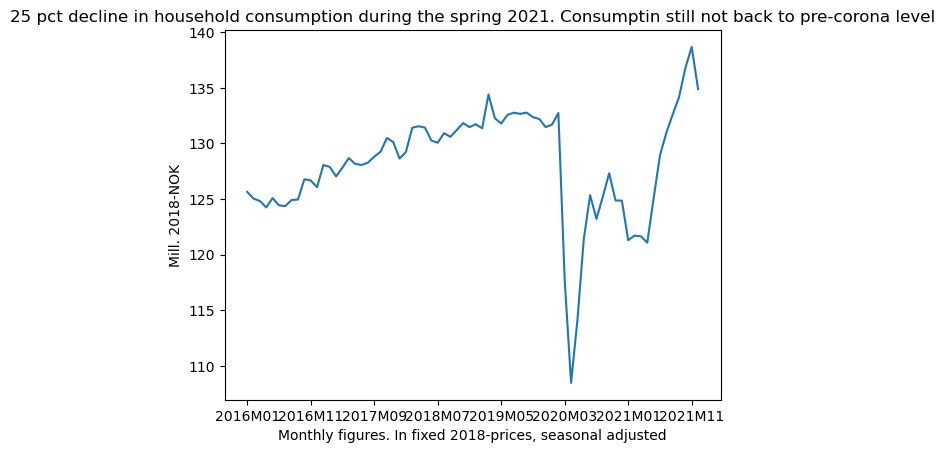

In [273]:
# Figur konsum i husholdningene, ses. just månedstall

(dfmnd['HouseholdConsumption']/1000).plot()
# dfmnd['OljeInvest'].plot()
# dfmnd['Offkonsum'].plot()
plt.title('25 pct decline in household consumption during the spring 2021. Consumptin still not back to pre-corona level')
# plt.rc('text', usetex=True)
plt.ylabel('Mill. 2018-NOK')
plt.xlabel('Monthly figures. In fixed 2018-prices, seasonal adjusted')
figfolder = 'Figures/Makro/'
plt.savefig('Figures/Makro/konsumMnd.png')
plt.show()

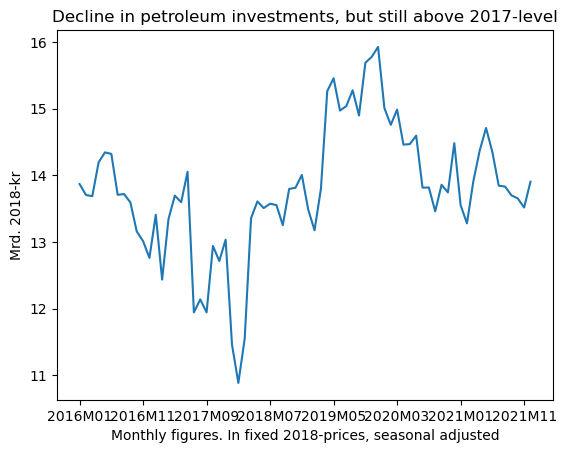

In [275]:
# Figur konsum i husholdningene, ses. just månedstall

(dfmnd['OilInvest']/1000).plot()
# dfmnd['OljeInvest'].plot()
# dfmnd['Offkonsum'].plot()
plt.title('Decline in petroleum investments, but still above 2017-level')
# plt.rc('text', usetex=True)
plt.ylabel('Mrd. 2018-kr')
plt.xlabel('Monthly figures. In fixed 2018-prices, seasonal adjusted')
figfolder = 'Figures/Makro/'
plt.savefig(figfolder + '/oljeInvestMnd.png')
plt.show()

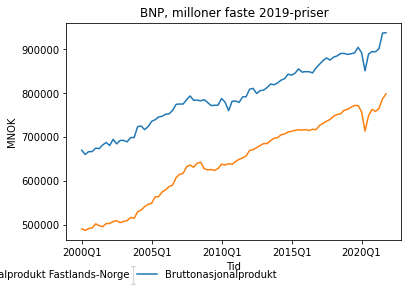

In [46]:
# 1.12 BNP sesjustert
#['2008K2':'2017K3']
plt.clf()
dfses['bnpb.nr23_9'].plot(label = 'Bruttonasjonalprodukt')
dfses['bnpb.nr23_9fn'].plot(label = 'Bruttonasjonalprodukt Fastlands-Norge')
# dfses['Glog_BNP'].plot()
# dfses['log_BNP'].plot()

plt.title('BNP, milloner faste '+fixedprices)
plt.ylabel('MNOK')
plt.xlabel("Tid")

plt.legend(bbox_to_anchor=(0.2, -0.2), loc=3,
           ncol=2, mode="expand", borderaxespad=0., fancybox=True )
figfolder = 'Figures/Makro/'
plt.savefig(figfolder + '1.12 BNP.png')
plt.show()

#,bbox_inches="tight"

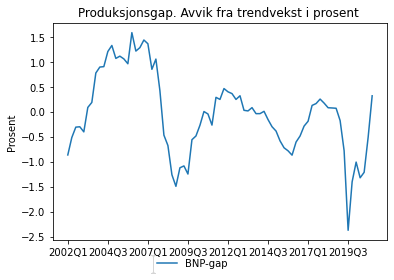

In [49]:


# 1.13 BNP sesjustert vekst

#dfses['Dlog_BNP']['2008K2':'2017K3'].plot(label = 'Bruttonasjonalprodukt Fastlands-Norge')
#dfses['GDlog_BNP']['2008K2':'2017K3'].plot(label='Trendvekst')
dfses['BNP-gap']['2002Q1':lastquarter].plot(label='BNP-gap')
plt.title('Produksjonsgap. Avvik fra trendvekst i prosent ')
plt.ylabel('Prosent')
plt.xlabel('')
plt.legend(bbox_to_anchor=(0.3, -0.15), loc=3,
           ncol=2, mode="expand", borderaxespad=0., fancybox=True )
#plt.legend()
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'BNP-gap.png')
plt.show()




In [268]:
# kolonnenavn
dfses['andelOlje'] = dfses['bif.nr83oljroer'] / dfses['bnpb.nr23_9fn']



In [271]:
dfses['andelOlje'].tail(50)

kvartal
2009Q3    0.062669
2009Q4    0.061384
2010Q1    0.059061
2010Q2    0.061010
2010Q3    0.054424
2010Q4    0.059235
2011Q1    0.062725
2011Q2    0.060886
2011Q3    0.066198
2011Q4    0.065226
2012Q1    0.067110
2012Q2    0.070145
2012Q3    0.069575
2012Q4    0.075283
2013Q1    0.076113
2013Q2    0.081921
2013Q3    0.086055
2013Q4    0.084091
2014Q1    0.083816
2014Q2    0.080879
2014Q3    0.077808
2014Q4    0.072836
2015Q1    0.073331
2015Q2    0.070728
2015Q3    0.065918
2015Q4    0.063133
2016Q1    0.057547
2016Q2    0.059954
2016Q3    0.057148
2016Q4    0.054315
2017Q1    0.053932
2017Q2    0.056524
2017Q3    0.048934
2017Q4    0.052265
2018Q1    0.045351
2018Q2    0.053858
2018Q3    0.053619
2018Q4    0.054687
2019Q1    0.053004
2019Q2    0.059489
2019Q3    0.058555
2019Q4    0.061389
2020Q1    0.059034
2020Q2    0.060992
2020Q3    0.054855
2020Q4    0.055147
2021Q1    0.053715
2021Q2    0.056710
2021Q3    0.052565
2021Q4    0.051442
Name: andelOlje, dtype: float64

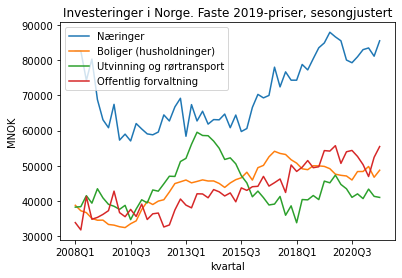

In [52]:
plt.clf()

#1.22 Investering
dfses['bif.nr83naer']['2008K2':lastquarter].plot(label = 'Næringer')
dfses['bif.nr8368']['2008K2':lastquarter].plot(label = 'Boliger (husholdninger)')
dfses['bif.nr83oljroer']['2008K2':lastquarter].plot(label = 'Utvinning og rørtransport')
# dfses['bif.nr83indberg']['2008K2':sistekvartal].plot(label = 'Industri') 
# dfses['bif.nr83rest']['2008K2':sistekvartal].plot(label = 'Andre tjenester') 
# dfses['bif.nr83vare']['2008K2':sistekvartal].plot(label = 'Annen vareproduksjon') 
dfses['bif.nr84_5']['2008K2':lastquarter].plot(label = 'Offentlig forvaltning')
plt.title('Investeringer i Norge. Faste '+fixedprices+', sesongjustert')
plt.ylabel('MNOK')
plt.legend()

figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'Investering.png')

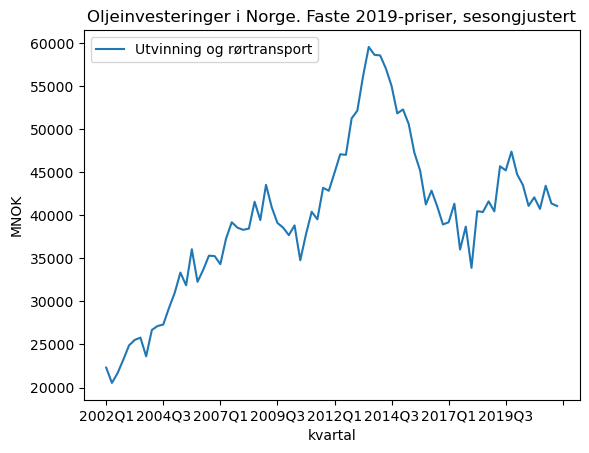

In [278]:
plt.clf()

#1.22 Investering
dfses['bif.nr83oljroer']['2002K2':lastquarter].plot(label = 'Utvinning og rørtransport')
# dfses['bif.nr83indberg']['2008K2':sistekvartal].plot(label = 'Industri') 
# dfses['bif.nr83rest']['2008K2':sistekvartal].plot(label = 'Andre tjenester') 
# dfses['bif.nr83vare']['2008K2':sistekvartal].plot(label = 'Annen vareproduksjon') 
plt.title('Oljeinvesteringer i Norge. Faste '+fixedprices+', sesongjustert')
plt.ylabel('MNOK')
plt.legend()

figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'Investering.png')

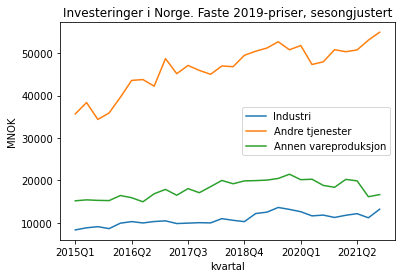

In [55]:
plt.clf()

#1.23 Andre investering
dfses['bif.nr83indberg']['2015K1':lastquarter].plot(label = 'Industri') 
dfses['bif.nr83rest']['2015K1':lastquarter].plot(label = 'Andre tjenester') 
dfses['bif.nr83vare']['2015K1':lastquarter].plot(label = 'Annen vareproduksjon') 
plt.title('Investeringer i Norge. Faste '+fixedprices+', sesongjustert')
plt.ylabel('MNOK')
plt.legend()
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'Andre ivestering.png')

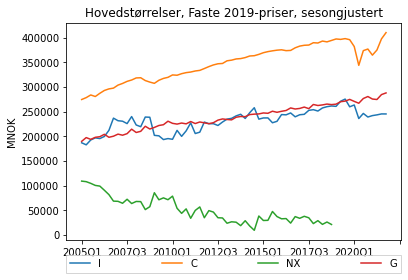

In [56]:
plt.clf()
#1.31 økosirk
#df['bnpb.nr23_9'].plot(label = 'Bruttonasjonalprodukt, markedsverdi')
#df['imp.nrtot'].plot(label = 'Im')#(label = 'Import i alt')
plt.clf()
dfses['bif.nr8_']['2005K3':lastquarter].plot(label = 'I')#(label = 'Bruttoinvestering i alt')
dfses['koh.nrpriv']['2005K3':lastquarter].plot(label = 'C')#(label = 'Konsum i husholdninger og ideelle organisasjoner')
(dfses['eks.nrtot']['2005K3':lastquarter]-dfses['imp.nrtot']['2005K3':'2019K1']).plot(label = 'NX')#(label = 'Eksport i alt')
dfses['makrok.nreoff']['2005K3':lastquarter].plot(label = 'G')#(label = 'Etterspørsel fra offentlig forvaltning')
plt.ylabel('MNOK')
plt.xlabel('')
#plt.legend()
plt.legend(bbox_to_anchor=(0., -0.15, 1, 0.25), loc=4,
           ncol=4, mode="expand", borderaxespad=0., fancybox=False )
plt.title("Hovedstørrelser, Faste "+fixedprices+", sesongjustert")
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'Økosirk.png')


In [57]:
# vekst fra forrige kvartal
DI = np.log(dfses['bif.nr8_']).diff()*100
DC = np.log(dfses['koh.nrpriv']).diff()*100
DX = np.log(dfses['eks.nrtot']).diff()*100
DNX = np.log(dfses['eks.nrtot']-dfses['imp.nrtot']+5000).diff()
D4G = np.log(dfses['makrok.nreoff']).diff(4)*25
D4I = np.log(dfses['bif.nr8_']).diff(4)*25
D4C = np.log(dfses['koh.nrpriv']).diff(4)*25

I_index = dfses['bif.nr8_']/dfses['bif.nr8_']['2019Q1']
C_index = dfses['koh.nrpriv']/dfses['koh.nrpriv']['2019Q1']
NX_index = (dfses['eks.nrtot']-dfses['imp.nrtot'])/(dfses['eks.nrtot']['2019Q1']-dfses['imp.nrtot']['2019Q1'])
G_index = dfses['makrok.nreoff']/dfses['makrok.nreoff']['2019Q1']
X_index = dfses['eks.nrtot']/dfses['eks.nrtot']['2019Q1']



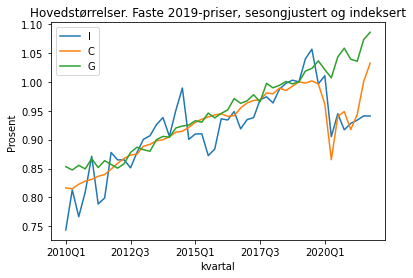

In [58]:
#1.32 økosirk - indeksert
#df['bnpb.nr23_9'].plot(label = 'Bruttonasjonalprodukt, markedsverdi')
#df['imp.nrtot'].plot(label = 'Im')#(label = 'Import i alt')
I_index['2010Q1':].plot(label = 'I')#(label = 'Bruttoinvestering i alt')
C_index['2010Q':].plot(label = 'C')#(label = 'Konsum i husholdninger og ideelle organisasjoner')
# X_index['2010Q':].plot(label = 'X')#(label = 'Eksport i alt')
# NX_index['2010Q':].plot(label = 'NX')#(label = 'Eksport i alt')
G_index['2010K1':].plot(label = 'G')#(label = 'Etterspørsel fra offentlig forvaltning')
plt.ylabel('Prosent')
plt.title('Hovedstørrelser. Faste '+fixedprices+', sesongjustert og indeksert')
plt.legend()
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'Økosirk2.png')


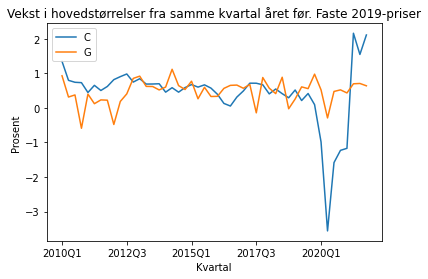

In [59]:
plt.clf()
#1.32 økosirk - vekst
#df['bnpb.nr23_9'].plot(label = 'Bruttonasjonalprodukt, markedsverdi')
#df['imp.nrtot'].plot(label = 'Im')#(label = 'Import i alt')
# D4I['2012Q1':sistekvartal].plot(label = 'I')#(label = 'Bruttoinvestering i alt')
D4C['2010Q1':lastquarter].plot(label = 'C')#(label = 'Konsum i husholdninger og ideelle organisasjoner')
# DNX['2010K1':sistekvartal].plot(label = 'NX')#(label = 'Eksport i alt')
D4G['2010Q1':lastquarter].plot(label = 'G')#(label = 'Etterspørsel fra offentlig forvaltning')
plt.ylabel('Prosent')
plt.xlabel('Kvartal')
plt.title('Vekst i hovedstørrelser fra samme kvartal året før. Faste '+fixedprices+'')
plt.legend()
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +' Økosirk vekst.png')


In [27]:
plt.clf()

#1 makrodata fra nasjonalregnskapet
df = pd.read_csv('http://data.ssb.no/api/v0/dataset/59012.csv?lang=en', encoding = 'latin1', na_values = '..')
df = df[df['contents'] == 'Current prices, seasonally adjusted (NOK million)']
df.drop('contents',1, inplace =True)
df = df.pivot(index = 'quarter',columns = 'macroeconomic indicator', values = '09190: Final expenditure and gross domestic product, by macroeconomic indicator, contents and quarter')
df.columns = [df.columns.str.split(' ')[i][0] for i in range(len(df.columns))]

df.head()

,bif.nr8307,bif.nr8368,bif.nr83_6,bif.nr83_6fn,bif.nr83_6fnxof,bif.nr83indberg,bif.nr83naer,bif.nr83oljroer,bif.nr83rest,bif.nr83vare,bif.nr84_5,bif.nr8_,bif.pub8X50A,bil.nr8lu_,biv.nr0890,bnpb.nr23_6fn,bnpb.nr23_6fnxof,bnpb.nr23_9,bnpb.nr23_9fn,bnpb.nr23indberg,bnpb.nr23oljsj,bnpb.nr23ptjfn,bnpb.nr23vare,bnpb.nr24_5,bnpb.nr29korr,eks.nrskiplfly,eks.nrtjen,eks.nrtot,eks.nrtradvare,eks.puboljegs,imp.nrskiplfly,imp.nrtjen,imp.nrtot,imp.nrtradvare,imp.puboljegs,koh.nr61L8,koh.nr61L9,koh.nr61_,koh.nr61tjen,koh.nr61vare,koh.nrpriv,koi.nr66_,koo.nr6401,koo.nr64_,koo.nr64sivil,koo.nr65_,koo.nroff,makrok.nrefn,makrok.nreoff,makrok.nrianv,makrok.nrsanv
quarter,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000K1,3331.0,11613.0,77899.0,57196.0,44682.0,6211.0,33069.0,14891.0,18780.0,4748.0,12514.0,81845.0,5812.0,3946.0,27.0,237286.0,180710.0,360266.0,280357.0,33144.0,79909.0,121741.0,25825.0,56576.0,43071.0,1901.0,36157.0,157495.0,46386.0,73051.0,10729.0,32848.0,107539.0,62627.0,1336.0,6858.0,-4410.0,151804.0,66196.0,83160.0,158146.0,6342.0,6970.0,27528.0,20558.0,42766.0,70294.0,285636.0,82808.0,310311.0,467779.0
2000K2,337.0,11635.0,76499.0,55735.0,42280.0,6158.0,30646.0,14492.0,19200.0,4952.0,13455.0,82997.0,6272.0,6498.0,27.0,238842.0,183129.0,368662.0,283439.0,34011.0,85222.0,122538.0,26580.0,55713.0,44597.0,2227.0,39567.0,164129.0,49060.0,73275.0,7642.0,34938.0,108862.0,65119.0,1162.0,7176.0,-4566.0,153496.0,67066.0,83820.0,160050.0,6553.0,6958.0,27798.0,20840.0,42524.0,70321.0,286107.0,83776.0,313395.0,477497.0
2000K3,328.0,12010.0,72631.0,54656.0,41757.0,5823.0,29747.0,13824.0,18806.0,4791.0,12899.0,81777.0,4151.0,9147.0,27.0,242973.0,185392.0,383176.0,287612.0,34634.0,95564.0,125518.0,25239.0,57581.0,44639.0,3663.0,40338.0,178007.0,49880.0,84126.0,6766.0,34220.0,109273.0,66484.0,1804.0,6743.0,-4600.0,154383.0,68249.0,83990.0,161096.0,6714.0,7001.0,27922.0,20921.0,43620.0,71541.0,287294.0,84440.0,314442.0,492422.0
2000K4,335.0,12532.0,72440.0,55743.0,42904.0,5335.0,30373.0,13850.0,19825.0,4877.0,12838.0,82986.0,2847.0,10546.0,27.0,246954.0,188799.0,395011.0,292483.0,34199.0,102528.0,128204.0,26397.0,58155.0,45530.0,3364.0,43525.0,188722.0,51951.0,89882.0,4202.0,36714.0,110420.0,67616.0,1888.0,7185.0,-5455.0,154683.0,69231.0,83722.0,161188.0,6505.0,7125.0,28510.0,21385.0,43998.0,72508.0,289438.0,85346.0,316709.0,505403.0
2001K1,777.0,13363.0,79944.0,60638.0,46621.0,6337.0,33258.0,14112.0,20641.0,5503.0,14016.0,80842.0,5194.0,898.0,28.0,255350.0,194492.0,391943.0,301798.0,35487.0,90146.0,131858.0,27147.0,60858.0,46448.0,3449.0,44540.0,183629.0,51481.0,84159.0,6185.0,37785.0,115072.0,69514.0,1587.0,6888.0,-4854.0,158353.0,70269.0,86050.0,165051.0,6699.0,7225.0,29633.0,22408.0,47834.0,77466.0,303156.0,91483.0,323386.0,506989.0


<Figure size 432x288 with 0 Axes>

<h3>Household income</h3> 
<ul>
    <li>Natinal accounts/Income statistics</li>
</ul>

In [70]:
url = 'https://www.ssb.no/statbank/sq/10027772'
df=pd.read_excel(url, skiprows=4, skipfooter=47)
df.index = pd.date_range(start='1/1/2002', end='31/12/2021', freq='Q')
df.drop(['Unnamed: 0'], inplace=True, axis=1)

In [71]:
df.tail(6)
# df.head()

,Inntekter og utgifter. Sesongjustert (mill kr)
2020-09-30,393401
2020-12-31,399631
2021-03-31,406791
2021-06-30,415344
2021-09-30,414753
2021-12-31,433552


In [72]:
df['Vekst i disponible inntekter'] = np.log(df['Inntekter og utgifter. Sesongjustert (mill kr)']).diff()*100
df['Vekst i disponible inntekter fra året før'] = np.log(df['Inntekter og utgifter. Sesongjustert (mill kr)']).diff(4)*100


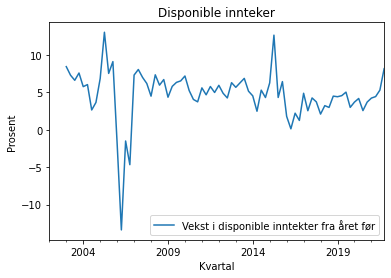

In [74]:
# Fig xx
# df['Disponible inntekter'] = df['Inntekter og utgifter. Sesongjustert (mill kr)']
df['Vekst i disponible inntekter fra året før'].plot()
plt.ylabel('Prosent')
plt.xlabel('Kvartal')
plt.title('Disponible innteker')
plt.legend()
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'Disp inntekt.png')

<h3>Varekonsumindeksen</h3>

In [75]:
# 1B Varekosumindeksen
url = 'http://www.ssb.no/statbank/sq/10025289/'
df_vki = pd.read_excel(url, skiprows=3, skipfooter=50)

In [79]:
df_vki.index = pd.date_range(start='1/1/2000', end='31/01/2022', freq='M')
# df_vki.drop(df_vki['Unnamed: 0'], axis=1)

df_vki.tail()

,Unnamed: 0,Totalt varekonsum
2021-09-30,2021M09,153.3
2021-10-31,2021M10,151.0
2021-11-30,2021M11,154.5
2021-12-31,2021M12,153.4
2022-01-31,2022M01,146.6


<AxesSubplot:>

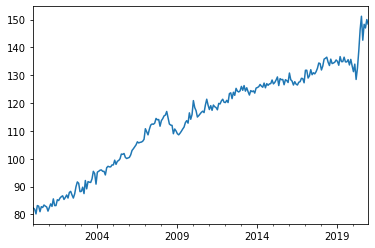

In [52]:
df_vki['Totalt varekonsum'].plot()

<h2>Money market rates and policy rates</h2>

In [23]:
# Money market rates
url = 'https://www.ssb.no/statbank/sq/10033602'
df_nibor = pd.read_excel(url, skiprows=3, skipfooter=56)
df_nibor.rename(columns={'Unnamed: 0':'Dato'}, inplace=True)
# df_nibor.index = df_nibor.Dato
# df_nibor.drop(['Dato'], axis=1, inplace=True)
df_nibor.rename(columns = {'NIBOR (3 mnd. effektiv)': 'Nibor 3M', 'Norges Banks foliorente (styringsrenten)':'FOLIO'}, inplace=True)

In [24]:
# Endrer dato til string - bruker str.replace for å erstatte M med -, kan deretter endre til datetime
df_nibor['DatoM'] = df_nibor['Dato'].astype('category')
df_nibor['DatoM'] = df_nibor['DatoM'].str.replace('M', '-')                     
df_nibor['date']=pd.to_datetime(df_nibor['DatoM']).dt.to_period('M')

In [25]:
df_nibor.index = df_nibor.date
df_nibor.drop(['DatoM', 'date', 'Dato'], axis=1, inplace=True)

In [26]:
df_nibor.tail()

,Nibor 3M,FOLIO
date,,
2020-10,0.45,0.0
2020-11,0.37,0.0
2020-12,0.50,0.0
2021-01,0.49,0.0
2021-02,0.46,0.0


In [27]:
# df['FOLIO'].head(10)

In [28]:
df_nibor.to_pickle('../dfnibor.pkl')

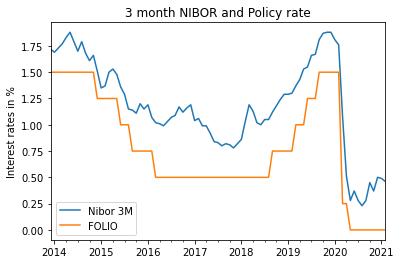

In [30]:

df_nibor.plot()
plt.title('3 month NIBOR and Policy rate')
plt.ylabel('Interest rates in %')
plt.xlabel("")
plt.savefig('2.0 NIBOR.png')

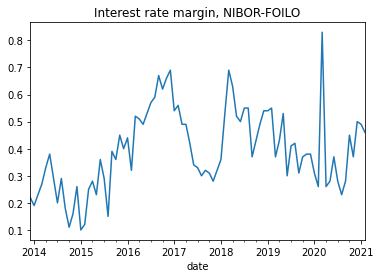

In [32]:
# Interest rate margin
plt.clf()
plt.title("Interest rate margin, NIBOR-FOILO")
df_nibor["MARGIN"]=df_nibor["Nibor 3M"]-df_nibor["FOLIO"]


df_nibor["MARGIN"].plot()
#df['FOLIO'].plot()
plt.savefig('../Figurer/Makro/2.2 Rentemargin.png')
plt.show()


<h2> Mortgage loan rates </h2>
<p> Average over Norwegian Banks <br>
Source: Statistics Norway </p>


In [36]:
# 10738: Renter på nye nedbetalingslån, etter utlånstype, sektor og bindingstid. Utvalg av banker og kredittforetak (prosent)
url = 'https://www.ssb.no/statbank/sq/10033653'
df_renter = pd.read_excel(url, skiprows=4, skipfooter=49)
df_renter.rename(columns = {'Unnamed: 0':'Date', 'Nedbetalingslån med pant i bolig':'Mortgage loan rates'}, inplace=True)

# Uncomment hvis en skal lage figur med dato (eller plasser etter endring til datetime)
# df_renter.index = df_renter.Dato
# df_renter.drop(columns=['Dato'], inplace=True)

In [42]:
# Endrer dato til string - bruker str.replace for å erstatte M med -, kan deretter endre til datetime
df_renter['DatoM'] = df_renter['Date'].astype('category')
df_renter['DatoM'] = df_renter['DatoM'].str.replace('M', '-')                     
# Endrer til DateTime og periode ÅÅÅÅ-MM:
df_renter['date']=pd.to_datetime(df_renter['DatoM']).dt.to_period('M')


df_renter.index = df_renter.date
df_renter.drop(columns=['Date','date', 'DatoM'], inplace=True)

In [43]:
df_renter.head()

,Mortgage loan rates
date,
2013-12,4.05
2014-01,4.04
2014-02,4.03
2014-03,4.02
2014-04,4.01


In [49]:
print(df_renter.head(), df_renter.tail())

         Nedbetalingslån med pant i bolig
date                                     
2013-12                              4.05
2014-01                              4.04
2014-02                              4.03
2014-03                              4.02
2014-04                              4.01          Nedbetalingslån med pant i bolig
date                                     
2020-05                              2.02
2020-06                              1.97
2020-07                              1.95
2020-08                              1.94
2020-09                              1.92


<AxesSubplot:xlabel='date'>

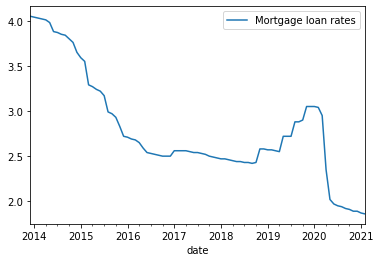

In [44]:
df_renter.plot()

In [46]:
# Merge data: Nibor/policy rate and mortgage rates

df_renters = df_nibor.merge(df_renter, left_on='date', right_on='date')


In [52]:
# df_renters

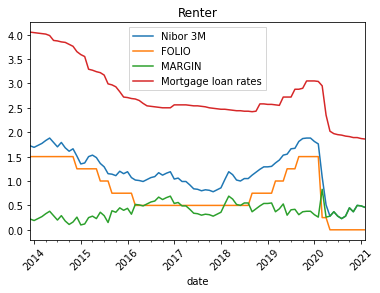

In [47]:
df_renters.plot()
plt.xticks(rotation=45)

# plt.xlabel(rotate='45')
plt.title('Renter')
plt.legend( fancybox=False )
plt.savefig('../Figurer/Makro/renter.png')
plt.show()

In [54]:
df_renters.corr()
df_renters.head()

,Nibor 3M,FOLIO,MARGIN,Nedbetalingslån med pant i bolig
date,,,,
2013-12,1.72,1.5,0.22,4.05
2014-01,1.69,1.5,0.19,4.04
2014-02,1.73,1.5,0.23,4.03
2014-03,1.77,1.5,0.27,4.02
2014-04,1.83,1.5,0.33,4.01


# Credit markets
* https://www.ssb.no/kredind

In [53]:
url = 'https://www.ssb.no/statbank/sq/10042059'  # sesongjusterte tall
# url = 'https://www.ssb.no/statbank/sq/10046976'  # ujusterte tall

In [54]:
df_k2 = pd.read_excel(url, skiprows=350, skipfooter=52, header=None, names = ['date', 'households', 'companies'])

df_k2.index = df_k2['date']
df_k2.drop(['date'], axis= 1, inplace=True)

df_k2['Dlog_K2'] = np.log(df_k2['households']).diff()*100
df_k2['Dlog_K2_12'] = np.log(df_k2['households']).diff(12)*100


In [56]:
df_k2.tail(5)
# df_k2.head()

,households,companies,Dlog_K2,Dlog_K2_12
date,,,,
2020M10,1924052,3774528,0.444843,3.544848
2020M11,1921851,3795848,-0.114459,3.397761
2020M12,1923109,3808376,0.065436,3.877643
2021M01,1930836,3824959,0.400992,3.643670
2021M02,1945610,3838251,0.762248,3.778269


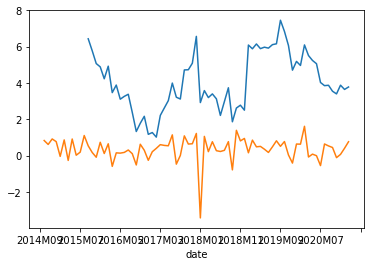

In [57]:
df_k2['Dlog_K2_12'].plot()
df_k2['Dlog_K2'].plot()
plt.show()


<h2>Konsumpriser</h2>

In [95]:
# KPI og KPI-JAE 
url= 'http://www.ssb.no/statbank/sq/10017630/'

kpi_df = pd.read_excel(url, skiprows=220, skipfooter=47, header=None, names=['Dato', 'KPI', 'KPI-JAE'])
# header = kpi_df.iloc[0]

# header[0]='Dato'
# header[1]='KPI'
# header[2] = 'KPI-JAE'
# # kpi_df = kpi_df[1:] #take the data less the header row
# kpi_df.columns = header

kpi_df.index=kpi_df['Dato']
kpi_df.drop(['Dato'], axis=1, inplace=True)

kpi_df['Dlog_KPI'] = np.log(kpi_df['KPI']).diff()
kpi_df['Dlog_KPI-JAE'] = np.log(kpi_df['KPI-JAE']).diff()
# .astype('int')


#  df.rename(index=str, columns={"A": "a", "B": "c"})

In [96]:
kpi_df['KPI'].dtype

dtype('float64')

In [97]:
kpi_df.tail()

,KPI,KPI-JAE,Dlog_KPI,Dlog_KPI-JAE
Dato,,,,
2021M09,117.3,114.0,0.005128,0.001756
2021M10,117.1,114.0,-0.001706,0.000000
2021M11,117.7,114.2,0.005111,0.001753
2021M12,118.7,114.6,0.008460,0.003497
2022M01,118.1,114.8,-0.005068,0.001744


In [98]:
kpi_df['log_KPI'] = np.log(kpi_df['KPI'].astype('float'))
kpi_df['log_KPI-JAE'] = np.log(kpi_df['KPI-JAE'].astype('float'))

kpi_df['Dlog_KPI'] = kpi_df['log_KPI'].diff()
kpi_df['Dlog_KPI-JAE'] = kpi_df['log_KPI-JAE'].diff()

kpi_df['DKPI'] = kpi_df['Dlog_KPI']*100
kpi_df['DKPI-JAE'] = kpi_df['Dlog_KPI-JAE']*100

In [99]:
# header
kpi_df.tail()

,KPI,KPI-JAE,Dlog_KPI,Dlog_KPI-JAE,log_KPI,log_KPI-JAE,DKPI,DKPI-JAE
Dato,,,,,,,,
2021M09,117.3,114.0,0.005128,0.001756,4.764735,4.736198,0.512822,0.175593
2021M10,117.1,114.0,-0.001706,0.000000,4.763028,4.736198,-0.170649,0.000000
2021M11,117.7,114.2,0.005111,0.001753,4.768139,4.737951,0.511074,0.175285
2021M12,118.7,114.6,0.008460,0.003497,4.776599,4.741448,0.846029,0.349651
2022M01,118.1,114.8,-0.005068,0.001744,4.771532,4.743191,-0.506758,0.174368


In [103]:
kpi_df['KPI-JAE, Trend']=kpi_df['DKPI-JAE'].rolling(window=3).mean()
kpi_df['KPI, Trend']=kpi_df['DKPI'].rolling(window=3).mean()


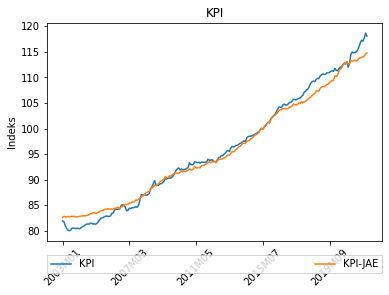

In [104]:
import datetime
now = datetime.datetime.now()

plt.clf()

# print("Current date and time using str method of datetime object")
# print(str(now))
# print("Current date and time using strftime")
# today=now.strftime("%Y-%d-%m")
# print(today)

kpi_df['KPI'].plot()
kpi_df['KPI-JAE'].plot()
plt.title('KPI')
plt.ylabel('Indeks')
plt.xticks(rotation=45)
plt.xlabel("")
plt.legend(bbox_to_anchor=(0., -0.15, 1, 0.25), loc=4,
           ncol=4, mode="expand", borderaxespad=0., fancybox=False )
# plt.savefig('../Figurer/Makro/KPI.png')
plt.show()


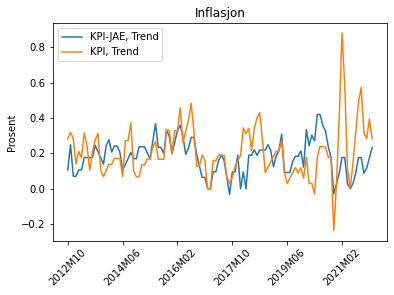

In [107]:
# kpi_df['DKPI']['2012M10':].plot()
kpi_df['KPI-JAE, Trend']['2012M10':].plot()
kpi_df['KPI, Trend']['2012M10':].plot()
plt.title('Inflasjon')
plt.ylabel('Prosent')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel("")
# plt.legend(bbox_to_anchor=(0., -0.15, 1, 0.25), loc=4,
#            ncol=4, mode="expand", borderaxespad=0., fancybox=False )
# plt.savefig('../Figurer/Makro/DKPI.png')
plt.show()


In [82]:
df.to_pickle('../df_nibor.pkl')

In [126]:
start= 'StartPeriod=2014'
url = 'https://data.norges-bank.no/api/data/EXR/B.USD+GBP+EUR.NOK.SP?'+start+'&format=csv-:-comma-true-y'

col_names = ['Dato','EURNOK', 'GBPNOK','USDNOK' ]
df = pd.read_csv(url, sep = ',', names=col_names, header=None)

df = df[9:]
# pd.to_numeric(df['EURNOK'], errors='ignore')

pd.to_datetime(df['Dato'])
df.index=df['Dato']
df.drop(['Dato'], axis=1, inplace=True)

# valuta=['GBPNOK','EURNOK','USDNOK']
# df[valuta].astype('float64', copy=True)
df = df.apply(pd.to_numeric, errors='coerce')

df.apply(pd.to_numeric, errors='coerce').dtypes


EURNOK    float64
GBPNOK    float64
USDNOK    float64
dtype: object

In [127]:
df.tail()

,EURNOK,GBPNOK,USDNOK
Dato,,,
2022-02-25,9.9756,11.9126,8.8941
2022-02-28,9.9465,11.9048,8.8816
2022-03-01,9.8598,11.8379,8.8334
2022-03-02,9.8826,11.8616,8.8984
2022-03-03,9.8418,11.8901,8.8857


In [128]:
df.to_pickle('../dfvalutaEur.pkl')


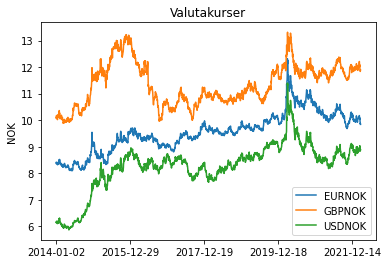

In [129]:
#3 valuta (jeg lager to plot fra denne kategorien for tilpasse størrelsesorden)

df.plot()
plt.xlabel('')
plt.ylabel('NOK')
plt.title('Valutakurser')
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'valuta.png')


In [130]:
df.head()

,EURNOK,GBPNOK,USDNOK
Dato,,,
2014-01-02,8.4025,10.1455,6.1521
2014-01-03,8.3585,10.0650,6.1306
2014-01-06,8.3900,10.1048,6.1682
2014-01-07,8.3850,10.0884,6.1469
2014-01-08,8.4110,10.1619,6.1873


In [118]:
start= 'StartPeriod=2014'
valutaer = 'SEK+TWI+I44'

url = 'https://data.norges-bank.no/api/data/EXR/B.'+valutaer+'.NOK.SP?'+start+'&format=csv-:-comma-true-y'


StartPeriod=2011


col_names = ['Dato', 'I44','SEK','KKI' ]



In [119]:
df = pd.read_csv(url, sep = ',' , names=col_names, header=None)

df = df[9:]

pd.to_datetime(df['Dato'])
df.index=df['Dato']
df.drop(['Dato'], axis=1, inplace=True)

valutaer = ['SEK','KKI','I44' ]
df[valutaer].astype('float64', copy=True)
df = df.apply(pd.to_numeric, errors='coerce')

df.apply(pd.to_numeric, errors='coerce').dtypes

I44    float64
SEK    float64
KKI    float64
dtype: object

In [120]:
# df.head()

<Figure size 432x288 with 0 Axes>

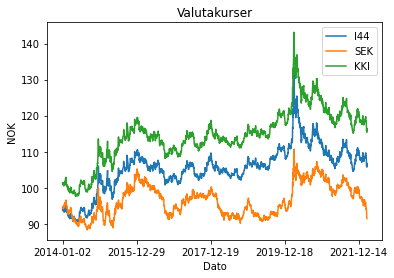

In [121]:
plt.clf()
#3.2 valuta
df.plot()
plt.ylabel('NOK')
plt.title('Valutakurser')
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'valuta_i44.png')


In [152]:
plt.clf()
#4 ledighet
dfaku = pd.read_csv('http://data.ssb.no/api/v0/dataset/1054.csv?lang=en', names = ['sex', 'age', 'time', 'contents','value'], header = 0)

# #cleaning
# for i in range(len(dfaku['value'])):
#     #df['value'][i] = str(df['value'][i]).replace(',', '.') #change decimalpoint from ',' to '.'
#     dfaku['value'][i] = str(dfaku['value'][i]).replace('..','NaN') # change '..' to 'NaN'
#     if dfaku['value'][i] == '.' or dfaku['value'][i] == '0':# find missing values as replace with 'NaN'
#         dfaku['value'][i] = 'NaN'
        
        
series = pd.Series(dfaku['value'].astype(np.float64))
series.index = [dfaku[dfaku.columns[i]] for i in range(4)]
l = series.index.levels

# series[l[0][0], l[1][1], l[2][14]].plot()
# plt.xlabel('Dato')
# plt.ylabel('Ledighet i %')
# plt.title('Ledighet for 15-74 år')
# figfolder = 'Figures/Makro/'
# plt.savefig(figfolder +'ledighet.png')




<Figure size 432x288 with 0 Axes>

In [153]:
dfaku.head()

,sex,age,time,contents,value
0,0 Both sexes,15-74 15-74 years,2006M02,"Labour force, seasonally adjusted (1 000 persons)",2413.0
1,0 Both sexes,15-74 15-74 years,2006M02,"Total employment (1 000 persons), seasonally a...",2319.0
2,0 Both sexes,15-74 15-74 years,2006M02,"Man-weeks worked of 37.5 hours, seasonally adj...",1792.0
3,0 Both sexes,15-74 15-74 years,2006M02,"Unemployment (LFS) (1 000 persons), seasonally...",94.0
4,0 Both sexes,15-74 15-74 years,2006M02,"Unemployment rate (LFS), seasonally adjusted",3.9


In [98]:
dfaku.to_pickle('../dfaku.pkl')


In [156]:
df_ = dfaku[dfaku['contents']=='Unemployment rate (LFS), seasonally adjusted']
df__ = df_[df_['age']=='15-74 15-74 years']
df_ = df__[df__['sex']=='0 Both sexes']



In [157]:
df_.head()

,sex,age,time,contents,value
4,0 Both sexes,15-74 15-74 years,2006M02,"Unemployment rate (LFS), seasonally adjusted",3.9
12,0 Both sexes,15-74 15-74 years,2006M03,"Unemployment rate (LFS), seasonally adjusted",3.8
20,0 Both sexes,15-74 15-74 years,2006M04,"Unemployment rate (LFS), seasonally adjusted",3.7
28,0 Both sexes,15-74 15-74 years,2006M05,"Unemployment rate (LFS), seasonally adjusted",3.7
36,0 Both sexes,15-74 15-74 years,2006M06,"Unemployment rate (LFS), seasonally adjusted",3.5


In [159]:
df_aku = df_['value'].astype('float')
df_aku.index = pd.date_range(start='28/02/2006', end='31/12/2021', freq='M')

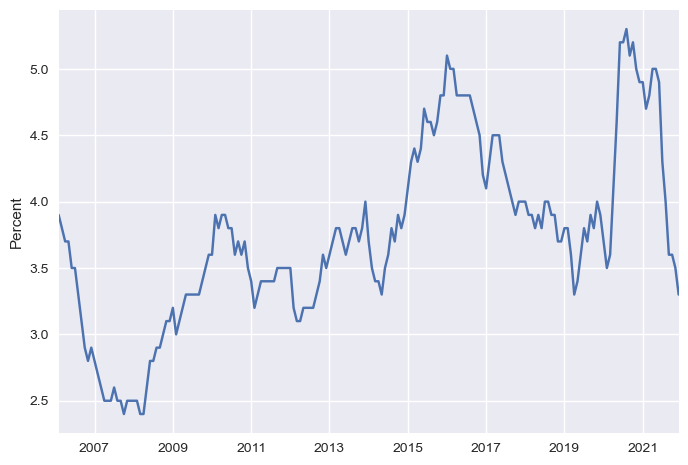

In [161]:
plt.style.use('seaborn')
df_aku['2006':].plot()
plt.ylabel('Percent')
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'Unemployment.png')
plt.show()
plt.style.use('default')

In [103]:
# Ledige stillinger
# url=http://www.ssb.no/statbank/sq/10017461/
    
    

In [203]:
# Dagpengemottakere
# https://www.nav.no/no/nav-og-samfunn/statistikk/flere-statistikkomrader/relatert-informasjon/soknader-om-dagpenger
# url = 'https://www.nav.no/_/attachment/download/c7c4abe6-f040-4014-93f3-eea1145f1bf2:d306a7f2712590e637d9e463f82edc31d12fd4d5/200421%20S%C3%B8knader_om_dagpenger_2021_uke_15.xlsx'
url = 'https://www.nav.no/_/attachment/download/9a8167dd-2c3a-49e9-afef-fe44f3b7ddff:8829d5252d9862f735fc36659c3b9bebe19372e3/24.01.22%20S%C3%B8knader%20om%20dagpenger%20Uke3.xlsx'
# næringser 
# url = 'https://www.nav.no/no/nav-og-samfunn/statistikk/flere-statistikkomrader/relatert-informasjon/soknader-om-dagpenger/_/attachment/download/45180f2d-4445-4f83-834e-5d8c95d2bf90:120845241b1ca3a76ab8d6b47559f543a743e4f8/2503%20-%20S%C3%B8knader_om_dagpenger._N%C3%A6ring.xlsx'
df_adpm = pd.read_excel(url, sheet_name='Tidsserie uke', skiprows=7, header=None)
df_adpm.drop(columns =[0, 3,6, 7, 8,9 ,10, 11, 12], inplace=True)
df_adpm.columns=['Date', 'Applications', 'Unemployed', 'Redundants']

df_adpm.index=df_adpm['Date']
df_adpm.drop(columns=['Date'], inplace=True)


C:\Users\jprestmo001\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [204]:
df_adpm.head()

,Applications,Unemployed,Redundants
Date,,,
202203,3892,2580,1312
202202,4572,2751,1821
202201,6747,3692,3055
202152,4819,2393,2426
202151,6538,2431,4107


In [205]:
df_adpm.sort_values('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

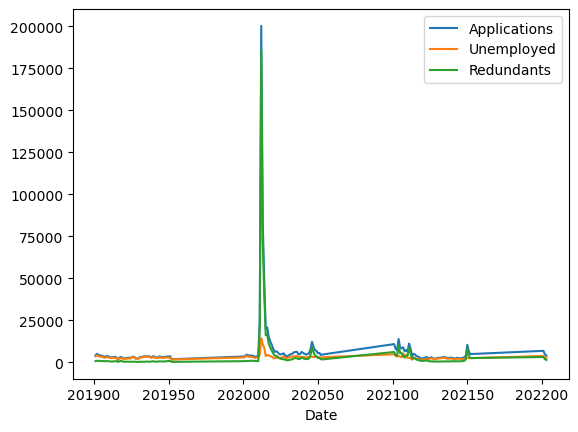

In [206]:
df_adpm.plot()

In [207]:
df_adpm['Sum Redundants'] = df_adpm['Redundants'].cumsum()
df_adpm['Sum Unemployed'] = df_adpm['Unemployed'].cumsum()
df_adpm['Sum applicants'] = df_adpm['Sum Redundants']+ df_adpm['Sum Unemployed']

In [208]:
df_adpm.head()

,Applications,Unemployed,Redundants,Sum Redundants,Sum Unemployed,Sum applicants
Date,,,,,,
201901,4133,3499,634,634,3499,4133
201902,4927,4091,836,1470,7590,9060
201903,4247,3514,733,2203,11104,13307
201904,4037,3286,751,2954,14390,17344
201905,3893,3208,685,3639,17598,21237


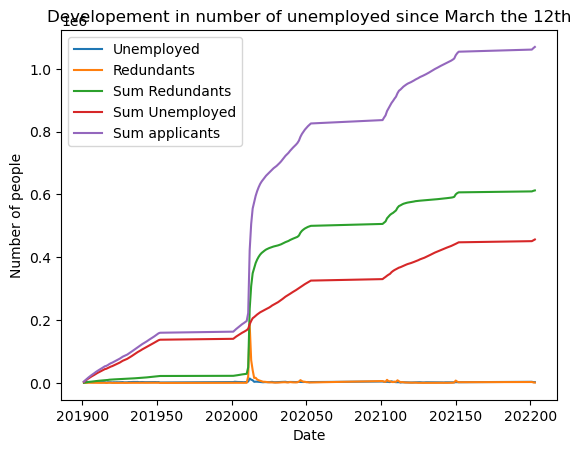

In [209]:
plt.style.use('default')
df_adpm['Unemployed'].plot()
df_adpm['Redundants'].plot()
df_adpm['Sum Redundants'].plot()
df_adpm['Sum Unemployed'].plot()
df_adpm['Sum applicants'].plot()

plt.legend()
plt.ylabel('Number of people')
plt.title('Developement in number of unemployed since March the 12th')
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'ledigeCovid.png')
plt.show()

In [211]:
# NAV og ant arbeidsledige
# url = 'https://www.nav.no/no/nav-og-samfunn/statistikk/flere-statistikkomrader/relatert-informasjon/ukentlig-statistikk-over-arbeidsledige/_/attachment/download/301ce315-1ba3-4ac6-b7d2-4b1dedb97e12:932ed3002f295f2749da05ecbea10cb5a3326e6f/1011%20Hovedtall%20om%20arbeidsmarkedet.%20Uke%2046.xlsx'
# df_adpmN = pd.read_excel(url, skiprows=1 , skipfooter=10)

In [116]:
df_adpmN.head()

,Unnamed: 0,Kilde: NAV,Hovedtall om arbeidsmarkedet. Uke,Unnamed: 3,Unnamed: 4
0,NaN,NaN,Om statistikken,NaN,NaN


In [212]:
#5 boligpris 
df = pd.read_csv('http://data.ssb.no/api/v0/dataset/1060.csv?lang=no', encoding = 'latin1', dtype = object, delimiter = ';')
df.columns = ['region', 'boligtype', 'tid', 'statistikkvariabel', 'prisindeks']
#df['Totalt'] = df['TOTAL Hele landet']

for i in range(len(df['tid'])):
    df['tid'][i] = df['tid'][i][:4] + 'Q' + df['tid'][i][5] #change 'K' to 'Q' in for quarter
    df['prisindeks'][i] = str(df['prisindeks'][i]).replace(',', '.') #change decimalpoint from ',' to '.'
    df['prisindeks'][i] = str(df['prisindeks'][i]).replace('..','NaN') # change '..' to 'NaN'
    if df['prisindeks'][i] == '.' or df['prisindeks'][i] == '0':# find missing values as replace with 'NaN'
        df['prisindeks'][i] = 'NaN'


#reorginaze data in a Series with text variables as multilayered indexes
series = pd.Series(df['prisindeks'].astype(np.float64))#, index = [df[df.columns[i]] for i in range(4)])
series.index = [df[df.columns[i]] for i in range(4)]






In [213]:
# dfbolig =df
df.to_pickle('../dfbolig.pkl')


In [214]:
df[df['boligtype']=="00 Boliger i alt"].sample(20)

,region,boligtype,tid,statistikkvariabel,prisindeks
3988,004 Trondheim,00 Boliger i alt,2010Q3,Prisindeks for brukte boliger,73.2
2058,002 Stavanger,00 Boliger i alt,2009Q2,Prisindeks for brukte boliger,74.7
1949,002 Stavanger,00 Boliger i alt,1995Q3,"Prisindeks for brukte boliger, sesongjustert",NaN
6898,007 Innlandet,00 Boliger i alt,2014Q2,Prisindeks for brukte boliger,96.9
9756,010 Trøndelag uten Trondheim,00 Boliger i alt,2011Q3,Prisindeks for brukte boliger,82.9
7875,008 Agder og Rogaland uten Stavanger,00 Boliger i alt,2016Q2,"Prisindeks for brukte boliger, sesongjustert",98.9
8718,009 Møre og Romsdal og Vestland uten Bergen,00 Boliger i alt,2001Q4,Prisindeks for brukte boliger,NaN
5845,006 Vestfold og Telemark og Viken uten Akershus,00 Boliger i alt,2002Q3,"Prisindeks for brukte boliger, sesongjustert",NaN
4013,004 Trondheim,00 Boliger i alt,2013Q3,"Prisindeks for brukte boliger, sesongjustert",92.2
8736,009 Møre og Romsdal og Vestland uten Bergen,00 Boliger i alt,2004Q1,Prisindeks for brukte boliger,NaN


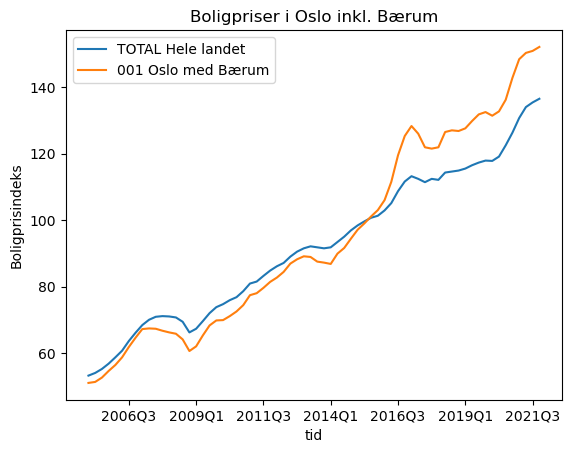

In [216]:

#5.1 boligpris i oslo og bærum
liste = ['TOTAL Hele landet','001 Oslo med Bærum' ]
for i in liste:
    series[i,'00 Boliger i alt',  :, 'Prisindeks for brukte boliger, sesongjustert']['1999Q1':].plot(label = i)
plt.legend()
plt.ylabel('Boligprisindeks')
plt.title('Boligpriser i Oslo inkl. Bærum')
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'boligpris oslo og landet.png')




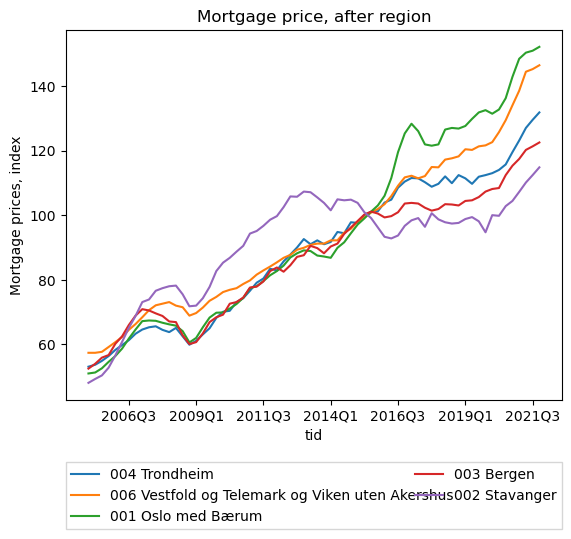

In [217]:
plt.clf()

#5.2 boligprisindeks regioner
# for i in series.index.levels[0][1:-1]:
#     series[i, '00 Boliger i alt', :, 'Prisindeks for brukte boliger, sesongjustert']['1999Q1':].plot(label = i)

liste = ['004 Trondheim', '006 Vestfold og Telemark og Viken uten Akershus', '001 Oslo med Bærum', '003 Bergen', '002 Stavanger']

for i in liste:
    series[i, '00 Boliger i alt', :, 'Prisindeks for brukte boliger, sesongjustert']['2004Q1':].plot(label = i)    
    
    
plt.legend(bbox_to_anchor=(0., -0.35, 1.0, 0.25), loc=4,
           ncol=2, mode="expand", borderaxespad=0., fancybox=False )    
plt.ylabel('Mortgage prices, index')
plt.title('Mortgage price, after region')
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'boligprisindeks regioner.png')




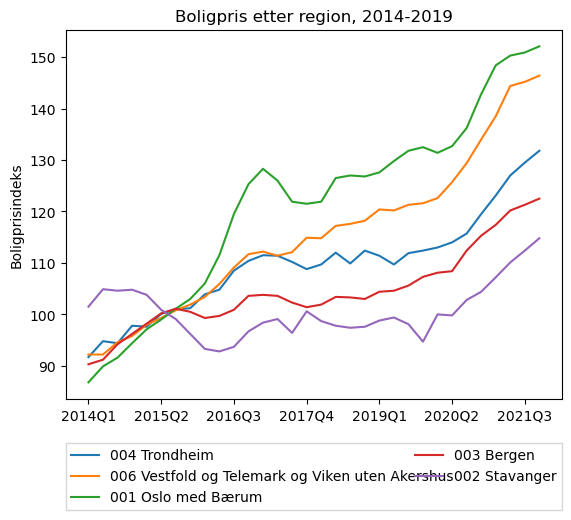

In [218]:

#5.22 boligprisindeks regioner
plt.clf()

liste = ['004 Trondheim', '006 Vestfold og Telemark og Viken uten Akershus', '001 Oslo med Bærum', '003 Bergen', '002 Stavanger']

for i in liste:
    series[i, '00 Boliger i alt', :, 'Prisindeks for brukte boliger, sesongjustert']['2014Q1':].plot(label = i)    
        
#plt.legend()
plt.legend(bbox_to_anchor=(0., -0.3, 1.0, 0.25), loc=4,
           ncol=2, mode="expand", borderaxespad=0., fancybox=False )    
plt.xlabel("")
plt.ylabel('Boligprisindeks')
plt.title('Boligpris etter region, 2014-2019')
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'boligprisindeks regioner_.png')
plt.show()

In [259]:
# Olje og gasspriser

url = 'https://www.ssb.no/statbank/sq/10064690'

df = pd.read_excel(url, skiprows=2)
df.drop(columns=['Unnamed: 0', 'Unnamed: 1',], inplace=True)
df.rename(columns={'Unnamed: 2': 'Date'},inplace=True)

In [260]:
df.head()

,Date,Produsentprisindeks (2015=100)
0,2003M01,30.0
1,2003M02,31.2
2,2003M03,30.6
3,2003M04,25.9
4,2003M05,25.6


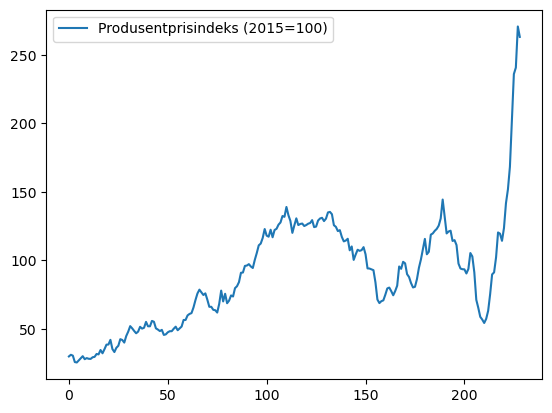

In [261]:
df.plot()
plt.show()


In [225]:
# EUROSTAT-- http://appsso.eurostat.ec.europa.eu/nui/show.do?query=BOOKMARK_DS-406779_QID_42D526A3_UID_-3F171EB0&layout=TIME,C,X,0;GEO,L,Y,0;UNIT,L,Z,0;S_ADJ,L,Z,1;NA_ITEM,L,Z,2;INDICATORS,C,Z,3;&zSelection=DS-406779UNIT,CLV10_MEUR;DS-406779INDICATORS,OBS_FLAG;DS-406779S_ADJ,SCA;DS-406779NA_ITEM,B1GQ;&rankName1=UNIT_1_2_-1_2&rankName2=INDICATORS_1_2_-1_2&rankName3=NA-ITEM_1_2_-1_2&rankName4=S-ADJ_1_2_-1_2&rankName5=TIME_1_0_0_0&rankName6=GEO_1_2_0_1&ppcRK=FIRST&ppcSO=ASC&sortC=ASC_-1_FIRST&rStp=&cStp=&rDCh=&cDCh=&rDM=true&cDM=true&footnes=false&empty=false&wai=false&time_mode=ROLLING&time_most_recent=true&lang=EN&cfo=%23%23%23%2C%23%23%23.%23%23%23
#  Ta ut datasett i excel - ta vare på, chainlinked volume, index=100, season and calender adjusted
# On seperate sheets eller bedre Not "Full extraction"
#http://appsso.eurostat.ec.europa.eu/nui/show.do?query=BOOKMARK_DS-406779_QID_54D3DCA_UID_-3F171EB0&layout=TIME,C,X,0;GEO,L,Y,0;UNIT,L,Z,0;S_ADJ,L,Z,1;NA_ITEM,L,Z,2;INDICATORS,C,Z,3;&zSelection=DS-406779UNIT,CLV10_MEUR;DS-406779INDICATORS,OBS_FLAG;DS-406779S_ADJ,SCA;DS-406779NA_ITEM,B1GQ;&rankName1=UNIT_1_2_-1_2&rankName2=INDICATORS_1_2_-1_2&rankName3=NA-ITEM_1_2_-1_2&rankName4=S-ADJ_1_2_-1_2&rankName5=TIME_1_0_0_0&rankName6=GEO_1_2_0_1&ppcRK=FIRST&ppcSO=ASC&sortC=ASC_-1_FIRST&rStp=&cStp=&rDCh=&cDCh=&rDM=true&cDM=true&footnes=false&empty=false&wai=false&time_mode=ROLLING&time_most_recent=false&lang=EN&cfo=%23%23%23%2C%23%23%23.%23%23%23
euro_df = pd.read_excel(r"G:\My Drive\Data\namq_10_gdp.xls", skiprows=9, na_values=":", skipfooter=3)

euro_df = euro_df.T

new_header = euro_df.iloc[0] #grab the first row for the header
new_header[0]='Time'
euro_df = euro_df[1:] #take the data less the header row
euro_df.columns = new_header


pd.to_datetime(euro_df['Time'])
euro_df.set_index('Time', inplace=True)


# euro_df["Germany"] = euro_df[]
euro_df.rename({'Euro area - 12 countries (2001-2006)':'Euro area', "Germany (until 1990 former territory of the FRG)": 'Germany'}, axis=1, inplace=True)


euro_df.tail()

Unnamed: 0,European Union - 28 countries (2013-2020),European Union - 15 countries (1995-2004),"Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015)",Euro area - 19 countries (from 2015),Euro area,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,Croatia,Italy,Cyprus,Latvia,Lithuania,Luxembourg,Hungary,Malta,Netherlands,Austria,Poland,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,Iceland,Norway,Switzerland,United Kingdom,Montenegro,North Macedonia,Albania,Serbia,Turkey,Bosnia and Herzegovina,Kosovo (under United Nations Security Council Resolution 1244/99),Euro area - 18 countries (2014)
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020Q4,NaN,NaN,2569399,2569399,2508146.8,100056.1,11168,47080.7,71375.1,727332.4,5075.5,79027.1,44195.4,272125.9,538897.9,12019.5,378962,5390.8,5870.3,9964.8,13315.7,31696.7,2701.1,177452,79337,122892.1,45163,43517.4,10629.3,21290.9,50904.6,111737,NaN,93119.6,133160.8,NaN,NaN,2173.3,NaN,9623.1,254518.6,NaN,NaN,NaN
2021Q1,NaN,NaN,2564113,2564113,2502342.1,101299.9,11324.1,46931.6,71212.8,715082.5,5244.5,86952.2,46050.9,270303.6,539813.8,12909.4,380177.6,5483.5,5908.7,10133,13815.4,32257.6,2782.3,176073.8,79026.2,124850.1,43874.4,44401.9,10784.8,20996.4,50758.9,113141.7,NaN,93085.2,133053.2,NaN,NaN,2162.1,NaN,9819.7,260128.5,NaN,NaN,NaN
2021Q2,NaN,NaN,2620528.3,2620528.3,2557558.5,103051.3,11415,47584.3,72856.6,730626.2,5371.4,91513.7,46996.5,273527.7,546917,13045.7,390541.9,5571.8,6029.1,10254.1,13819.6,32962.1,2809.6,182689.5,82243.2,127141.2,45773.7,44869.7,11000.1,21385,51669.3,114090.7,NaN,93837.5,135487.1,NaN,NaN,2164.8,NaN,9985.7,264519.7,NaN,NaN,NaN
2021Q3,NaN,NaN,2679880.7,2679880.7,2616518.5,105153.3,11478.5,48333.5,73709.6,742824.3,5426.5,92379.1,48270.6,280721.6,564058.4,13226,400747.3,5668,6058.3,10327.8,13886.1,33265.2,2903.6,186537.8,85029.7,130088.5,47041.6,44900.5,11148.3,21460.2,52148.2,116220.6,NaN,97524.8,138014.9,NaN,NaN,NaN,NaN,10150.5,271857.3,NaN,NaN,NaN
2021Q4,NaN,NaN,2687644.7,2687644.7,2624053,105693.4,NaN,48782.4,74533.6,740245.3,5522.3,NaN,NaN,286368.5,568045.7,13207.3,403202.3,5710.1,6053.9,10443.6,13957.3,33919,2970.5,188267.3,83796.4,132266,47785.8,44692.3,11746.6,21532.6,52451.1,117526.2,NaN,97592.7,138408.6,NaN,NaN,NaN,NaN,10324.7,275965,NaN,NaN,NaN


In [222]:
euro_df.to_pickle('../dfeuro.pkl')
print('Fransk BNP-fall',((527715-560402)/560402*100))

Fransk BNP-fall -5.832777184949375


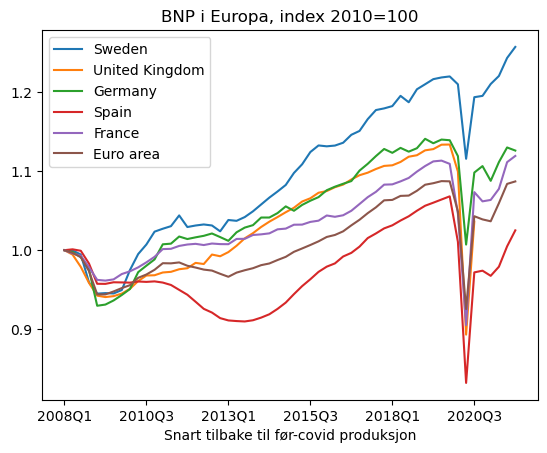

In [240]:

# Figur 6.1  BNP fra Eurostat
plt.clf()

nlastquarter = '2021Q3'

(euro_df['Sweden']['2008Q1':lastquarter]/euro_df['Sweden']['2008Q1']).plot()  # late with NA-data
(euro_df['United Kingdom']['2008Q1':lastquarter]/euro_df['United Kingdom']['2008Q1']).plot()  # late with NA-data
(euro_df['Germany']['2008Q1':lastquarter]/euro_df['Germany']['2008Q1']).plot()  # late with NA-data
(euro_df['Spain']['2008Q1':lastquarter]/euro_df['Spain']['2008Q1']).plot()
(euro_df['France']['2008Q1':lastquarter]/euro_df['France']['2008Q1']).plot()
(euro_df['Euro area']['2008Q1':lastquarter]/euro_df['Euro area']['2008Q1']).plot()

plt.title("BNP i Europa, index 2010=100")
plt.legend()
plt.xlabel('Snart tilbake til før-covid produksjon')
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'BNPEuroOmrådet.png')
plt.show()

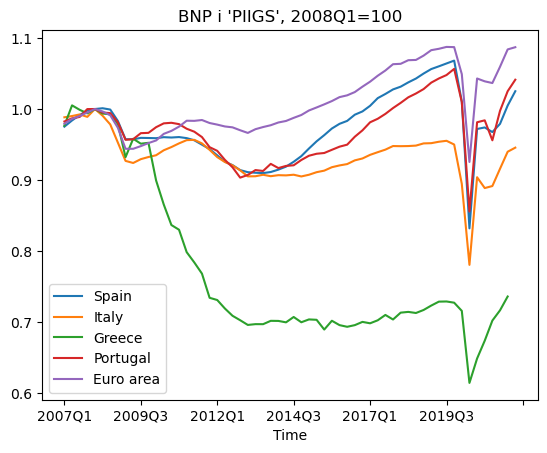

In [238]:

plt.clf()
# FIG 6.2 PIIGS
(euro_df['Spain']['2006Q1':lastquarter]/euro_df['Spain']['2008Q1']).plot()
(euro_df["Italy"]['2006Q1':lastquarter]/euro_df["Italy"]['2008Q1']).plot()
(euro_df["Greece"]['2006Q1':lastquarter]/euro_df["Greece"]['2008Q1']).plot()
(euro_df["Portugal"]['2006Q1':lastquarter]/euro_df["Portugal"]['2008Q1']).plot()
# (euro_df["Ireland"]['2006Q1':lastquarter]/euro_df["Ireland"]['2008Q1']).plot()
(euro_df['Euro area']['2006Q1':lastquarter]/euro_df['Euro area']['2008Q1']).plot()

plt.title("BNP i 'PIIGS', 2008Q1=100")
plt.legend()
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'BNPPIIGS.png')
plt.show()
# PIIGS - opprinnelig uten italia, men ser at det er den første I'en som går bra og Italia er fortsatt ikke over 2008-nivå, 
# Irland går derimot helt fantastisk - GAFA har boosted BNP??

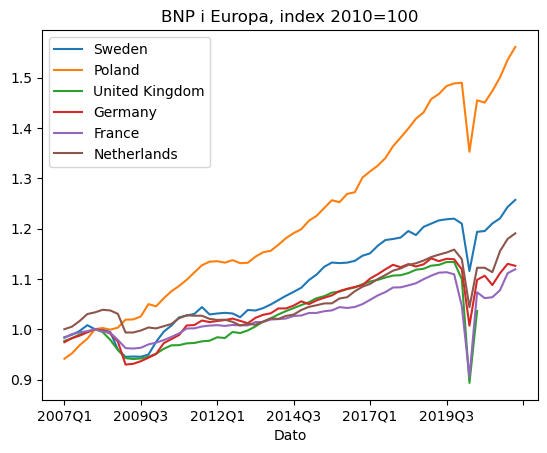

<Figure size 640x480 with 0 Axes>

In [236]:

plt.clf()
(euro_df['Sweden']['2007Q1':lastquarter]/euro_df['Sweden']['2008Q1']).plot()
(euro_df['Poland']['2007Q1':lastquarter]/euro_df['Poland']['2008Q1']).plot()
(euro_df['United Kingdom']['2007Q1':lastquarter]/euro_df['United Kingdom']['2008Q1']).plot()
(euro_df['Germany']['2007Q1':lastquarter]/euro_df['Germany']['2008Q1']).plot()
(euro_df['France']['2007Q1':lastquarter]/euro_df['France']['2008Q1']).plot()
(euro_df['Netherlands']['2007Q1':lastquarter]/euro_df['Netherlands']['2007Q1']).plot()
plt.title("BNP i Europa, index 2010=100")

plt.legend()
plt.xlabel('Dato')
plt.show()
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'BNPeuroområdet.png')

In [265]:
# Unemployment

# http://appsso.eurostat.ec.europa.eu/nui/show.do?query=BOOKMARK_DS-055624_QID_2DC4BB93_UID_-3F171EB0&layout=TIME,C,X,0;GEO,L,Y,0;S_ADJ,L,Z,0;AGE,L,Z,1;UNIT,L,Z,2;SEX,L,Z,3;INDICATORS,C,Z,4;&zSelection=DS-055624SEX,T;DS-055624UNIT,PC_ACT;DS-055624S_ADJ,SA;DS-055624AGE,TOTAL;DS-055624INDICATORS,OBS_FLAG;&rankName1=UNIT_1_2_-1_2&rankName2=AGE_1_2_-1_2&rankName3=INDICATORS_1_2_-1_2&rankName4=SEX_1_2_-1_2&rankName5=S-ADJ_1_2_-1_2&rankName6=TIME_1_0_0_0&rankName7=GEO_1_2_0_1&sortC=ASC_-1_FIRST&rStp=&cStp=&rDCh=&cDCh=&rDM=true&cDM=true&footnes=false&empty=false&wai=false&time_mode=ROLLING&time_most_recent=false&lang=EN&cfo=%23%23%23%2C%23%23%23.%23%23%23

# euroU_df = pd.read_csv(r'C:\Users\i235jbp\Documents\GitHub\une_rt_m.xls',na_values = ':',)
euroU_df = pd.read_excel(r'G:\My Drive\Data\une_rt_m.xls', skiprows=10, skipfooter =3, na_values = ':',)
euroU_df = euroU_df.T
header = euroU_df.iloc[0]
header[0]='TIME'
header[11] = 'Germany'
header[2] = "Euro19"

euroU_df = euroU_df[1:]
euroU_df.columns = header
# pd.to_datetime(euroU_df['TIME'])
euroU_df.set_index('TIME', inplace=True)


# euroU_df = euroU_df[euroU_df["S_ADJ"]=="Seasonally adjusted data, not calendar adjusted data"]
# euroU_df = euroU_df[euroU_df["UNIT"]=="Percentage of active population"]
# #dfses.drop('statistikkvariabel',1, inplace=True)
# euroU_df.drop(["UNIT","S_ADJ", "TIME", "SEX", "AGE"], 1, inplace=True)
# #dfses = dfses.pivot(index = 'kvartal', columns = 'makrostørrelse', values = 'Makroøkonomiske hovedstørrelser, etter makrostørrelse, kvartal og statistikkvariabel')
# euroU_df['Value'] = euroU_df['Value'].astype('float64')
# euroU_df = euroU_df.pivot(columns = 'GEO', values="Value")

euroU_df.head()


Unnamed: 0,Euro area - 19 countries (from 2015),Euro19,Bulgaria,Czechia,Denmark,Germany (until 1990 former territory of the FRG),Estonia,Ireland,Greece,Spain,Germany,Croatia,Italy,Cyprus,Latvia,Lithuania,Luxembourg,Hungary,Malta,Netherlands,Austria,Poland,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,Iceland,Norway,United Kingdom,Turkey,United States,Japan,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015)",Euro area - 18 countries (2014),European Union - 25 countries (2004-2006),EU27,European Union - 28 countries (2013-2020)
TIME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005M01,9.2,8.3,11.2,8.2,5.3,10.7,9.2,4.4,10.2,10.1,8.7,13.6,7.8,4.9,11.5,9.8,4.8,6.6,6.7,7,5.7,18.1,8.7,7.8,6.4,17.3,9.3,7,3.1,4.5,4.7,9.3,5.3,4.5,NaN,NaN,NaN,NaN,NaN
2005M02,9.2,8.5,10.9,8.2,5.2,10.9,9.3,4.3,9.8,9.9,8.6,13.5,8,5,11.1,9.5,4.8,6.8,6.9,7.2,5.6,18.2,8.8,7.9,6.5,17.1,8.9,7.8,3,4.4,4.6,9.1,5.4,4.6,NaN,NaN,NaN,NaN,NaN
2005M03,9.3,8.6,10.6,7.9,5.2,10.9,8.6,4.5,10.2,9.7,8.6,13.5,7.9,5.2,10.7,9.3,4.7,6.9,7.2,7.1,6.1,18.3,8.9,7.9,6.4,17,7.9,7.3,2.9,4.6,4.6,9.3,5.2,4.5,NaN,NaN,NaN,NaN,NaN
2005M04,9.3,8.4,10.4,8,5.2,11.2,8.3,4.8,10,9.7,8.7,13.3,7.9,5.4,10.3,9.3,4.7,7.1,7.4,7.1,6,18.4,9.1,7.2,6.1,16.7,8.9,7.7,2.9,4.6,4.7,9.5,5.2,4.5,NaN,NaN,NaN,NaN,NaN
2005M05,9.3,8.6,10.1,8,5,11.2,8,4.9,9.8,9.4,8.9,13.3,7.6,5.8,10,9,4.7,7.2,7.3,7.2,6.2,18.4,9.1,7.4,6,16.6,8.1,8.2,2.9,4.6,4.7,9.7,5.1,4.5,NaN,NaN,NaN,NaN,NaN


In [266]:
euroU_df.tail()

Unnamed: 0,Euro area - 19 countries (from 2015),Euro19,Bulgaria,Czechia,Denmark,Germany (until 1990 former territory of the FRG),Estonia,Ireland,Greece,Spain,Germany,Croatia,Italy,Cyprus,Latvia,Lithuania,Luxembourg,Hungary,Malta,Netherlands,Austria,Poland,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,Iceland,Norway,United Kingdom,Turkey,United States,Japan,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015)",Euro area - 18 countries (2014),European Union - 25 countries (2004-2006),EU27,European Union - 28 countries (2013-2020)
TIME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021M10,7.3,6.1,4.8,2.4,4.7,3.2,5.3,5.2,13.3,13.9,7.5,7.3,9.3,6.6,7.2,6.8,5,4,3.3,3.9,5.8,3,6.4,5.5,4.7,6.4,6.7,8.5,4.6,3.6,NaN,11.2,4.6,2.7,NaN,NaN,NaN,NaN,NaN
2021M11,7.1,5.9,4.8,2.2,4.6,3.2,5.4,5.2,13.6,13.4,7.3,7.1,9.1,6.5,7.3,6.7,4.9,3.9,3.2,3.7,5.2,3,6.3,5.5,4.6,6.4,6.8,8.2,4.5,3.5,NaN,11.2,4.2,2.8,NaN,NaN,NaN,NaN,NaN
2021M12,7,5.7,4.8,2.1,4.5,3.2,5.5,5.2,13,13,7.2,6.9,9,6.6,7.4,6.6,5,3.7,3.2,3.8,4.8,2.9,5.8,5.7,4.4,6.4,7.2,8,4.3,3.3,NaN,NaN,3.9,2.7,NaN,NaN,NaN,NaN,NaN
2022M01,6.8,5.6,4.7,2.2,4.7,3.1,5.3,5.2,13.3,12.7,7,6.5,8.8,6.1,7.3,7,4.7,3.8,3.1,3.6,4.9,2.8,6,5.7,4.2,6.4,7.1,8.1,4.2,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
2022M02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


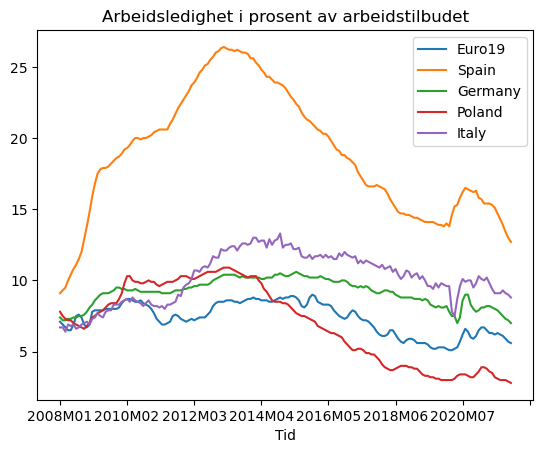

In [267]:
plt.clf()
euroU_df['Euro19']['2007Q1':].plot()
euroU_df["Spain"]["2007Q1":].plot()
euroU_df["Germany"]["2007Q1":].plot()
# euroU_df["France"]["2007Q1":].plot()
# euroU_df["United Kingdom"]["2007Q1":].plot()
euroU_df["Poland"]["2007Q1":].plot()
euroU_df["Italy"]["2007Q1":].plot()
plt.title("Arbeidsledighet i prosent av arbeidstilbudet")
plt.legend()
plt.xlabel("Tid")
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'/ledighetEuro.png')
plt.show()

In [216]:
# US renter 
# # Treasury bills
# fsb_url = "https://www.federalreserve.gov/datadownload/Output.aspx?rel=H15&series=efc162fd6c9e30df971fc84ad58a07dd&lastobs=100&from=&to=&filetype=spreadsheetml&label=include&layout=seriescolumn"
# # 3-Month London Interbank Offered Rate (LIBOR), based on U.S. Dollar 
# fred_url = 'https://fred.stlouisfed.org/graph/fredgraph.xls?chart_type=line&recession_bars=on&log_scales=&bgcolor=%23e1e9f0&graph_bgcolor=%23ffffff&fo=Open+Sans&ts=12&tts=12&txtcolor=%23444444&show_legend=yes&show_axis_titles=yes&drp=0&cosd=2013-03-29&coed=2018-03-28&height=450&stacking=&range=Custom&mode=fred&id=USD3MTD156N&transformation=lin&nd=1986-01-02&ost=-99999&oet=99999&lsv=&lev=&mma=0&fml=a&fgst=lin&fgsnd=2009-06-01&fq=Daily&fam=avg&vintage_date=&revision_date=&line_color=%234572a7&line_style=solid&lw=2&scale=left&mark_type=none&mw=2&width=1168'
                        
# fsb_df = pd.read_excel("C:/Users/i235jbp/Documents/GitHub/FRB_3mnd10år_2019februar.xlsx", header = None, skiprows=7, missing = "ND")
fsb_df = pd.read_excel("C:/Users/i235jbp/Documents/GitHub/Data/Makro/FRB_H15.xlsx", header = None, skiprows=7, missing = "ND")

fsb_df.columns = ["Dato",'12mnth action rate','composite yield 10 yrs' ,'3mnth auction bill rate', "LIBOR","T-bill" ,"T-bill-1year","Treasury3year","Treasury10year"]
pd.to_datetime(fsb_df['Dato'])
fsb_df.index = fsb_df.Dato
#fsb_df.drop("Dato", inplace=True)





In [219]:
fsb_df.tail()


,Dato,12mnth action rate,composite yield 10 yrs,3mnth auction bill rate,LIBOR,T-bill,T-bill-1year,Treasury3year,Treasury10year
Dato,,,,,,,,,
2019-12,2019-12,NaN,NaN,NaN,NaN,1.54,1.51,1.63,1.86
2020-01,2020-01,NaN,NaN,NaN,NaN,1.52,1.49,1.52,1.76
2020-02,2020-02,NaN,NaN,NaN,NaN,1.52,1.37,1.31,1.50
2020-03,2020-03,NaN,NaN,NaN,NaN,0.29,0.32,0.50,0.87
2020-04,2020-04,NaN,NaN,NaN,NaN,0.14,0.18,0.28,0.66


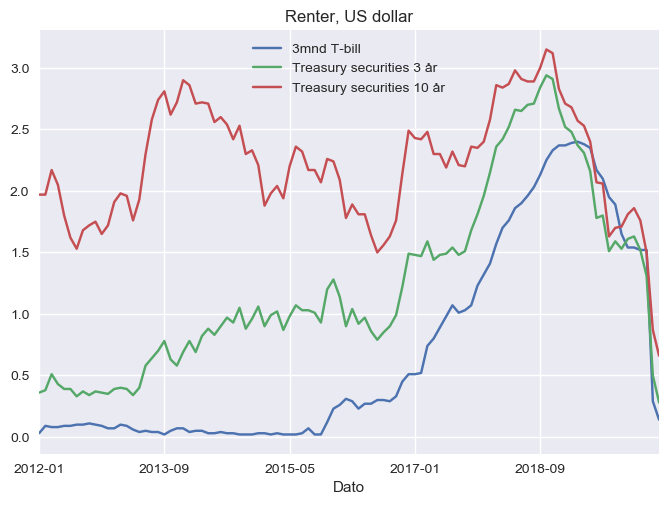

In [218]:
# Figur 7.1 - US renter
plt.clf()
#fsb_df["LIBOR"].plot()
fsb_df["T-bill"].plot(label="3mnd T-bill")
# fsb_df["LIBOR"].plot(label="LIBOR")
fsb_df["Treasury3year"].plot(label="Treasury securities 3 år")
fsb_df["Treasury10year"].plot(label="Treasury securities 10 år")
plt.title("Renter, US dollar")
plt.legend()
plt.savefig('../Figurer/Makro/7.1 US renter.png')


In [220]:
pd.to_datetime(fsb_df['Dato'])
fsb_df['Dato'] = fsb_df['Dato'].datetime.strptime("%Y-%m").strftime("%Y-%m-%d")
fsb_df['2014-02-07':].head()
# fsb_df.tail()

AttributeError: 'Series' object has no attribute 'datetime'

In [ ]:
fsb_df.to_pickle('../dffsb.pkl')


In [222]:

# fred_url = 'https://fred.stlouisfed.org/graph/fredgraph.xls?chart_type=line&recession_bars=on&log_scales=&bgcolor=%23e1e9f0&graph_bgcolor=%23ffffff&fo=Open+Sans&ts=12&tts=12&txtcolor=%23444444&show_legend=yes&show_axis_titles=yes&drp=0&cosd=2013-03-29&coed=2018-03-28&height=450&stacking=&range=Custom&mode=fred&id=USD3MTD156N&transformation=lin&nd=1986-01-02&ost=-99999&oet=99999&lsv=&lev=&mma=0&fml=a&fgst=lin&fgsnd=2009-06-01&fq=Daily&fam=avg&vintage_date=&revision_date=&line_color=%234572a7&line_style=solid&lw=2&scale=left&mark_type=none&mw=2&width=1168'
                        
# fred_df = pd.read_excel(fred_url,  skiprows=10, na_values = "#I/T")
#fred_df = pd.read_excel('G:\Analyse\Makro\Regneark\USD3MTD156N.xls', skiprows=10)
fred_df = pd.read_excel('C:/Users/i235jbp/Documents/GitHub/USD3MTD156N.xls', skiprows=10)
fred_df.columns = ["Dato", "LIBOR"]


fred_df.ffill() # får ikke denne til å fungere
fred_df.index = fred_df.Dato

fred_df.dropna(inplace=True)

# for å ta bort nullere som oppstår pga bank holidays
# fred_df=fred_df[fred_df>0.0]

In [224]:
fred_df.tail()

,Dato,LIBOR
Dato,,
2019-02-01,2019-02-01,2.73263
2019-02-04,2019-02-04,2.73438
2019-02-05,2019-02-05,2.73850
2019-02-06,2019-02-06,2.73763
2019-02-07,2019-02-07,2.69700


In [ ]:
fred_df_m = pd.read_excel('C:/Users/i235jbp/Documents/GitHub/USD3MTD156NM.xls', skiprows=10)
fred_df_m.columns = ["Dato", "LIBOR"]

pd.to_datetime(fred_df_m['Dato'])
fred_df_m.index = fred_df_m.Dato

fred_df_m.head()

In [ ]:
# Figur 8.1 - US renter
plt.clf()
#fsb_df["LIBOR"].plot()
fred_df["LIBOR"].plot(label="Eurodollar libor")
#fsb_df["T-bill-1year"].plot(label="1år T-bill")
#fred_df["Treasury3year"].plot(label="Treasure securities 3 år")
plt.title("LIBOR, Eurodollar")
plt.legend()
plt.savefig('../Figurer/Makro/8.1 Eurodollar LIBOR.png')
    
# fred_df['LIBOR']['2017-12-24':'2017-12-31'].plot()
plt.show()


In [ ]:

# result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
fred_df_m.head()
fsb_df.head()
# nibor_df.head()
# nok_df.head()
# valuta_df.head()
# fsb_df.drop('LIBOR', axis=1, inplace=True)
# renter_df = pd.concat([fred_df, nibor_df, valuta_df], axis=1, join_axes=[fred_df.index])
renter_df = pd.concat([fred_df, valuta], axis=1, join_axes=[fred_df.index])


renter_df.head(8)

In [ ]:
renter_df["LIBOR"].plot(label="Eurodollar libor")
renter_df["T-bill"].plot(label="3mnd T-bill")
#fred_df["Treasury3year"].plot(label="Treasure securities 3 år")
plt.title("LIBOR, Eurodollar og T-bills")
plt.legend()
plt.savefig('8.2 Tbill LIBOR.png')
    
# fred_df['LIBOR']['2017-12-24':'2017-12-31'].plot()
plt.show()


In [ ]:
# Figur 9.1 norske renter og libor
# plt.clf()
# renter_df['LIBOR'].plot()
# renter_df['NIBOR 3M'].plot()
# renter_df['1 USD'].plot(secondary_y=True)
# plt.title("Renter, NOK/USD, 3M NIBOR og LIBOR")
# plt.legend()


# plt.savefig('renteparitet.png')

# fig, ax1 = plt.subplots()

# ax2 = ax1.twinx()
# ax1.plot(renter_df['dato'], renter_df['LIBOR'], 'g-')
# ax2.plot(renter_df['dato'], renter_df['1 USD'] )

# ax1.set_xlabel('X data')
# ax1.set_ylabel('Y1 data', color='g')
# ax2.set_ylabel('Y2 data', color='b')

# plt.show()



In [ ]:
# DEV:

# US - contribution to to growth in GDP 
# Net export: https://fred.stlouisfed.org/series/A019RY2Q224SBEA
# Consumption: https://fred.stlouisfed.org/graph/?g=mZP4
# Public consumption: https://fred.stlouisfed.org/graph/?g=mZP7
# Investment: Gross private inventories: https://fred.stlouisfed.org/graph/?g=mZP9
# Investments: Gross private investments: https://fred.stlouisfed.org/graph/?g=mZPb
# Contributions to percent change in real gross domestic product: Gross private domestic investment: Fixed investment: https://fred.stlouisfed.org/graph/?g=mZPd



In [ ]:
# US savings

# fred_url = 
                        
# fred_df = pd.read_excel(fred_url,  skiprows=10, na_values = "#I/T")
#fred_df = pd.read_excel('G:\Analyse\Makro\Regneark\USD3MTD156N.xls', skiprows=10)
fred_df_s = pd.read_excel('C:/Users/i235jbp/Documents/GitHub/Data/Makro/A072RC1Q156SBEA.xls', skiprows=10)
fred_df_s.columns = ["Dato", "US savings"]
fred_df_s.index = fred_df_s.Dato



In [ ]:
fred_df_s.head()

In [ ]:
# Figur 10.1 - US savings
plt.clf()
fred_df_s["US savings"].plot(label="Sparerate, USA husholdninger")
#fsb_df["T-bill-1year"].plot(label="1år T-bill")
#fred_df["Treasury3year"].plot(label="Treasure securities 3 år")
plt.title("Sparerate i USA, husholdninger")
# plt.legend()
plt.savefig('../Figurer/Makro/10.1 US savings.png')
    
plt.show()


In [ ]:
# US debt to GDP

fred_df_debt = pd.read_excel('C:/Users/i235jbp/Documents/GitHub/Data/Makro/GFDEGDQ188S.xls', skiprows=10)
fred_df_debt.columns = ["Dato", "USDebtToGDP"]
fred_df_debt.index = fred_df_debt.Dato
fred_df_debt.head()

In [ ]:
# Figur 10.2 - US debt to gdp
plt.clf()
fred_df_debt["USDebtToGDP"].plot(label="Sparerate, USA husholdninger")
#fsb_df["T-bill-1year"].plot(label="1år T-bill")
#fred_df["Treasury3year"].plot(label="Treasure securities 3 år")
plt.title("Gjedsgrad i USA, offentlig")
# plt.legend()
plt.savefig('../Figurer/Makro/10.2 US debtratio.png')
    
plt.show()


In [229]:
#  https://www.nve.no/energiforsyning/kraftmarkedsdata-og-analyser/magasinstatistikk/
el_df = pd.read_excel('C:/Users/i235jbp/Documents/GitHub/Data/Makro/Fyllingsgrad.xlsx', skiprows=2)
# fred_df_debt.columns = ["Dato", "USDebtToGDP"]
# fred_df_debt.index = fred_df_debt.Dato
# fred_df_debt.head()


In [230]:
el_df.head()

,Iso_uke,Nåværende år,Min,Median,Maks,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1,0.640810,0.426842,0.679188,0.787623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.624639,NaN,NaN
1,2,0.639191,0.404336,0.656149,0.755858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.605142,NaN,NaN
2,3,0.627861,0.386367,0.629205,0.725133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.575437,NaN,NaN
3,4,0.621983,0.363698,0.597440,0.692209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.539403,NaN,NaN
4,5,0.604162,0.346099,0.567435,0.671378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.504785,NaN,NaN


In [ ]:
# merge year and week column
# el_df['period'] = el_df[['År', 'Uke']].apply(lambda x: ''.join(x), axis=1)
# pd.MultiIndex.from_frame(el_df)
pd.__version__

In [ ]:
# el_df['Hele landet'].plt()
# plt.show()


In [ ]:
df = pd.DataFrame([[11, 22], [13, 23]], columns=['sub_1', 'sub_2'])

# First plot single-header dataframe (headers = ['sub_1', 'sub_2'])
plt.table(cellText=df.round(4).values, cellLoc='center', bbox=[0.225, 1, 0.7, 0.15],
    rowLabels=['  {}  '.format(i) for i in df.index], rowLoc='center',
    rowColours=['silver']*len(df.index), colLabels=df.columns, colLoc='center',
    colColours=['lightgrey']*len(df.columns), colWidths=[0.1]*len(df.columns))

# Then plot a new table with one cell (value = 'main')
plt.table(cellText=[['main']], cellLoc='center', bbox=[0.225, 1.15, 0.7, 0.05],
    cellColours=[['Lavender']])

In [263]:
import requests
import json
import prettytable
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CUUR0000SA0','SUUR0000SA0'],"startyear":"2011", "endyear":"2014"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)
for series in json_data['Results']['series']:
    x=prettytable.PrettyTable(["series id","year","period","value","footnotes"])
    seriesId = series['seriesID']
    for item in series['data']:
        year = item['year']
        period = item['period']
        value = item['value']
        footnotes=""
        for footnote in item['footnotes']:
            if footnote:
                footnotes = footnotes + footnote['text'] + ','
        if 'M01' <= period <= 'M12':
            x.add_row([seriesId,year,period,value,footnotes[0:-1]])
    output = open(seriesId + '.txt','w')
    output.write (x.get_string())
    output.close()

In [ ]:
# US inflation

url = 'https://data.bls.gov/images/buttons/download_button_xlsx'

pd